<a href="https://colab.research.google.com/github/romulokps/covid/blob/main/explorerCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20, 8)

In [ ]:
#download SEADE
#!wget https://www.seade.gov.br/wp-content/uploads/2021/06/Dados-covid-19-estado.csv
!wget https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/casos_obitos_doencas_preexistentes.csv.zip
!unzip -o casos_obitos_doencas_preexistentes.csv.zip -d '/content/drive/MyDrive/dados/'

Archive:  casos_obitos_doencas_preexistentes.csv.zip
  inflating: /content/drive/MyDrive/dados/casos_obitos_doencas_preexistentes.csv  


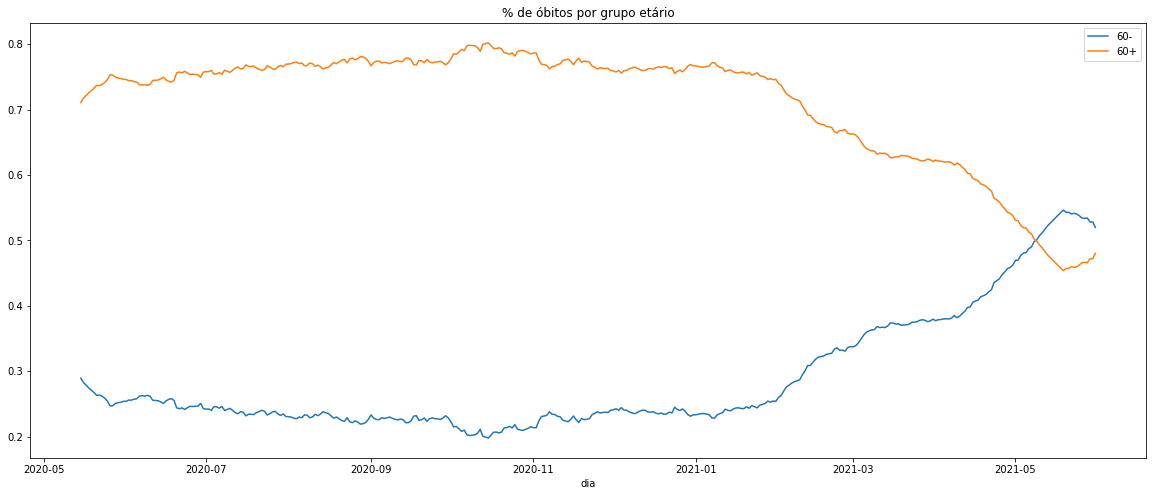

In [ ]:
#SEADE
def seade(idade = 60):
  caminho = '/content/drive/MyDrive/dados/casos_obitos_doencas_preexistentes.csv'
  dfv = pd.read_csv(caminho, sep = ';')
  dfv.head(1)
  df = dfv[dfv['diagnostico_covid19'] == 'CONFIRMADO']
  df = df[df['obito'] == 1]
  df['data_inicio_sintomas'] = pd.to_datetime(df['data_inicio_sintomas'],format='%Y-%m-%d', errors = 'coerce').dt.date
  df = df[df['data_inicio_sintomas']>pd.to_datetime('2020-05-01')]
  df = df[df['data_inicio_sintomas']<pd.to_datetime('2021-06-01')]
  df['CAT']=pd.cut(df.idade,bins=[0,idade,150],labels=['idade-','idade+'])
  df2 = df[['data_inicio_sintomas', 'CAT']]
  #df2 = df.pivot_table(index=['DT_EVOLUCA'], columns='CAT')
  df2 = df2.groupby(by=['data_inicio_sintomas', 'CAT']).size().reset_index().rename(columns={0:'qtd'})
  df2 = df2.pivot_table(index=['data_inicio_sintomas'], columns='CAT')
  df2
  ap = pd.DataFrame(df2.to_records())
  colunas = ['dia','0+','10+','20+','30+','40+','50+','60+','70+','80+','90+','100+']
  colunas = ['dia','{}-'.format(idade),'{}+'.format(idade)]
  ap.columns = colunas
  for i in colunas[1:]:
    ap[i] = ap[i].rolling(14).mean()
  ap = ap.set_index('dia')
  df3 = ap.divide(ap.sum(axis=1), axis=0)
  df3.plot(title='% de óbitos por grupo etário')
seade(60)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


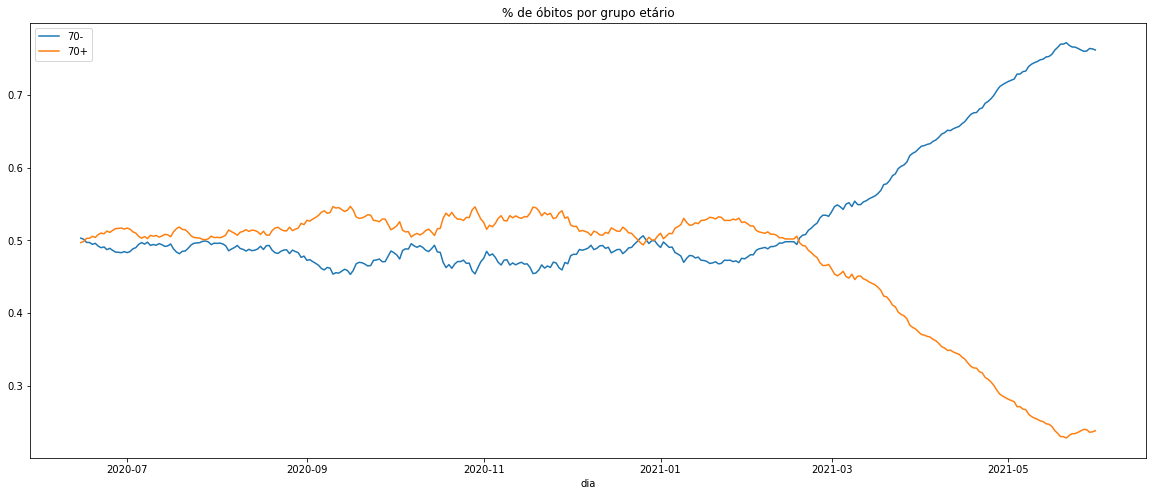

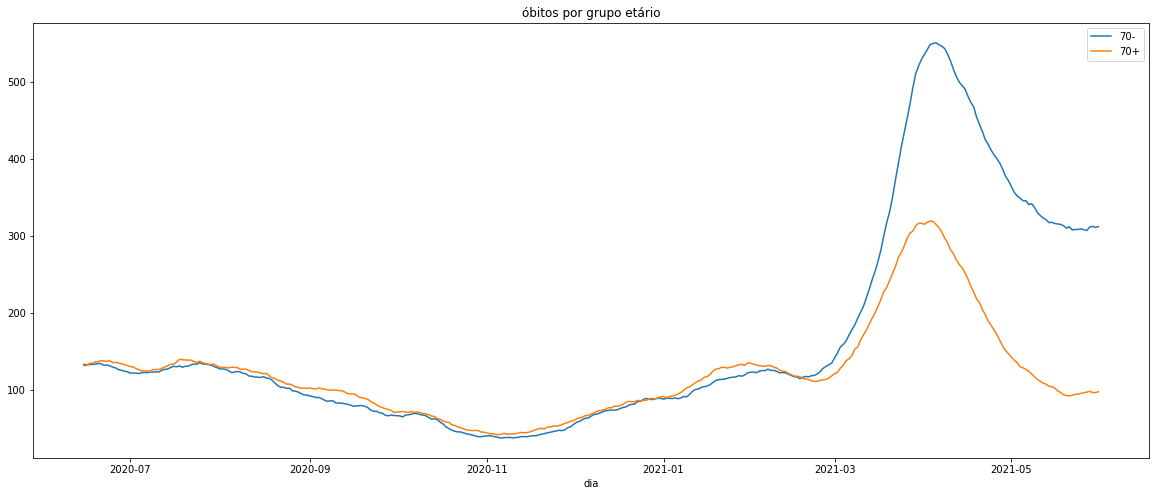

In [ ]:
#SRAG COVID
idade = 70
last = pd.read_csv('/content/drive/My Drive/dados/last.csv')
cols = ['NU_IDADE_N', 'CLASSI_FIN', 'EVOLUCAO','UTI', 'CS_GESTANT','DT_EVOLUCA', 'SG_UF_NOT','SUPORT_VEN','CO_MUN_NOT']
#dfv = pd.read_csv('/content/drive/MyDrive/dados/srag/' + last.iloc[4,1], sep = ";", low_memory=True, usecols = cols, skiprows=lambda i: i>0 and random.random() > 0.1) #merged
dfv = pd.read_csv('/content/drive/MyDrive/dados/srag/' + last.iloc[4,1], sep = ";", low_memory=True, usecols = cols) #merged
dfv['DT_EVOLUCA'] = pd.to_datetime(dfv['DT_EVOLUCA'],format='%d/%m/%Y', errors = 'coerce').dt.date
df = dfv[dfv['CLASSI_FIN'] == 5] 
df = df[df['EVOLUCAO'] == 2]
df = df[df['SG_UF_NOT'] == 'SP']
df = df[df['DT_EVOLUCA']>pd.to_datetime('2020-06-01')]
df = df[df['DT_EVOLUCA']<pd.to_datetime('2021-06-01')]
df['CAT']=pd.cut(df.NU_IDADE_N,bins=[0,idade,150],labels=['idade-','idade+'])
df2 = df[['DT_EVOLUCA', 'CAT', 'EVOLUCAO']]
#df2 = df.pivot_table(index=['DT_EVOLUCA'], columns='CAT')
df2 = df2.groupby(by=['DT_EVOLUCA', 'CAT']).size().reset_index().rename(columns={0:'qtd'})
df2 = df2.pivot_table(index=['DT_EVOLUCA'], columns='CAT')
ap = pd.DataFrame(df2.to_records())
colunas = ['dia','{}-'.format(idade),'{}+'.format(idade)]
ap.columns = colunas
for i in colunas[1:]:
  ap[i] = ap[i].rolling(14).mean()
ap = ap.set_index('dia')
df3 = ap.divide(ap.sum(axis=1), axis=0)
print(df3.plot(title='% de óbitos por grupo etário'))
print(ap.plot(title='óbitos por grupo etário'))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


AxesSubplot(0.125,0.125;0.775x0.755)


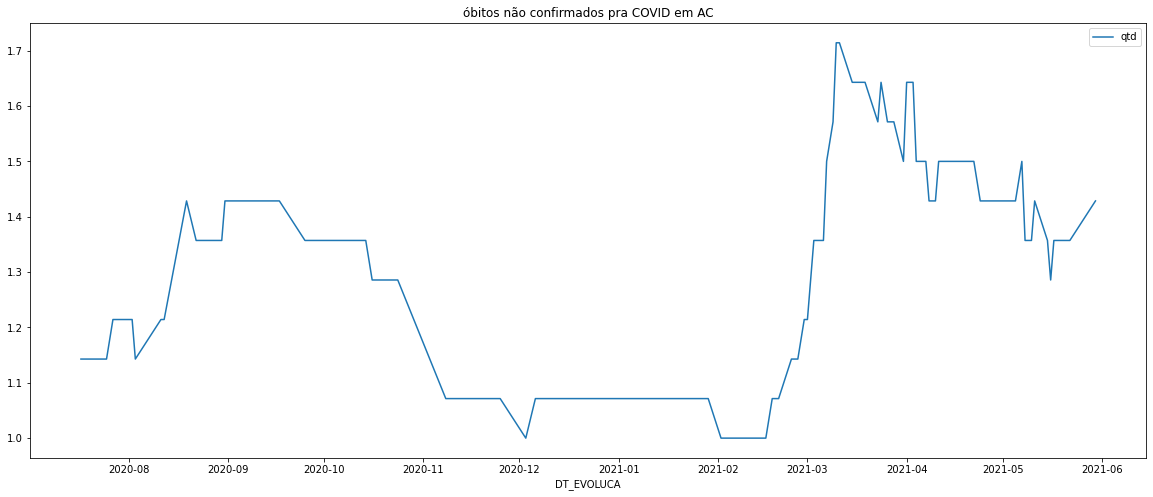

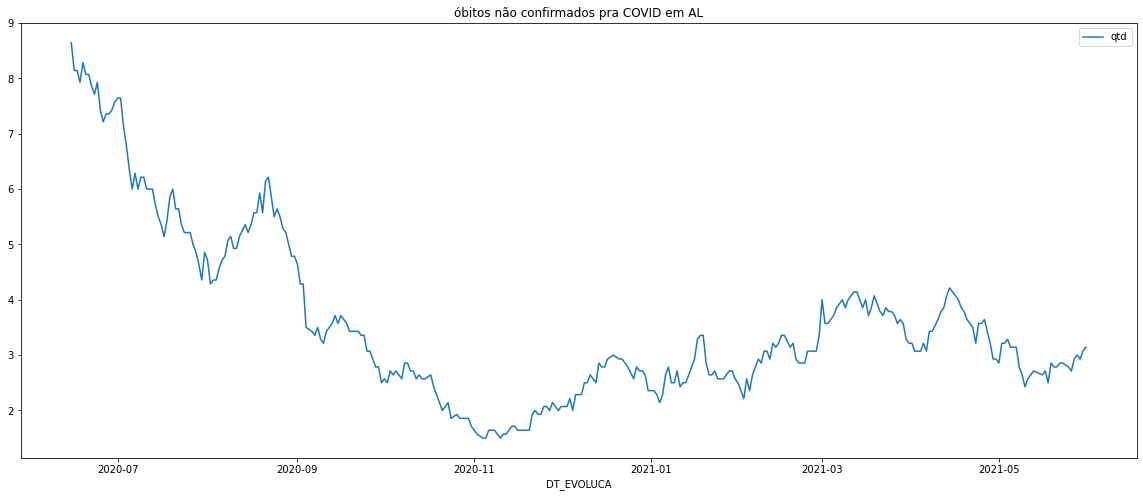

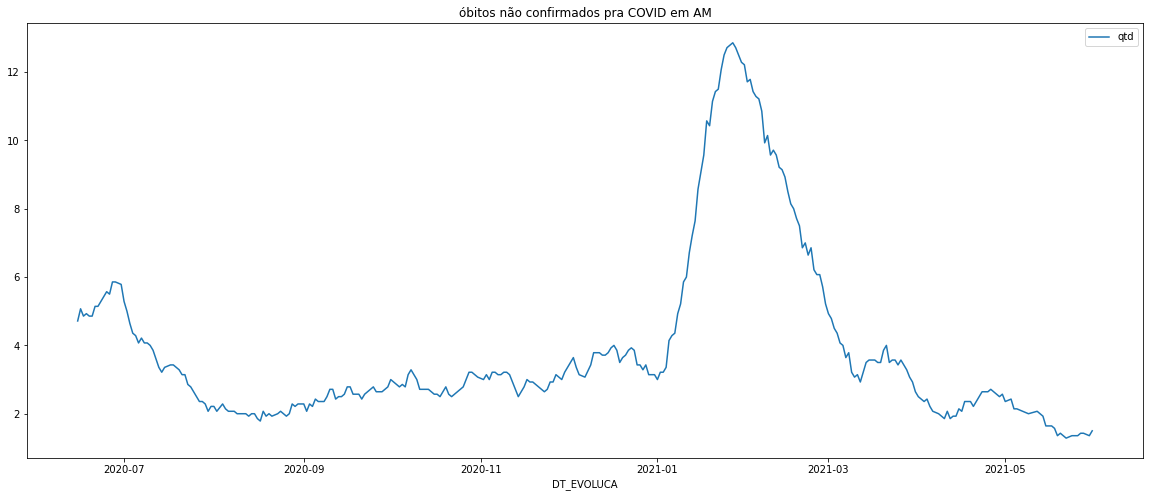

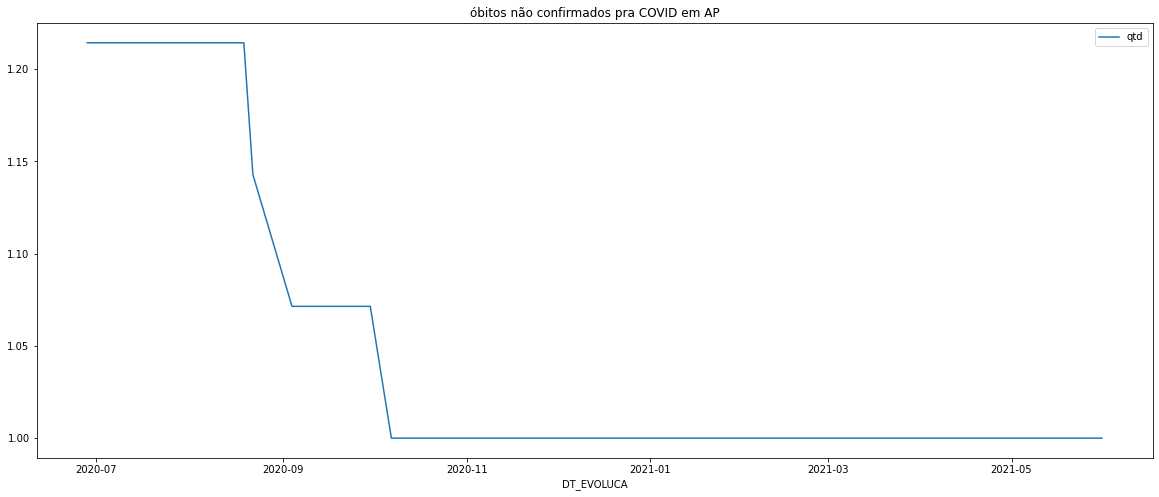

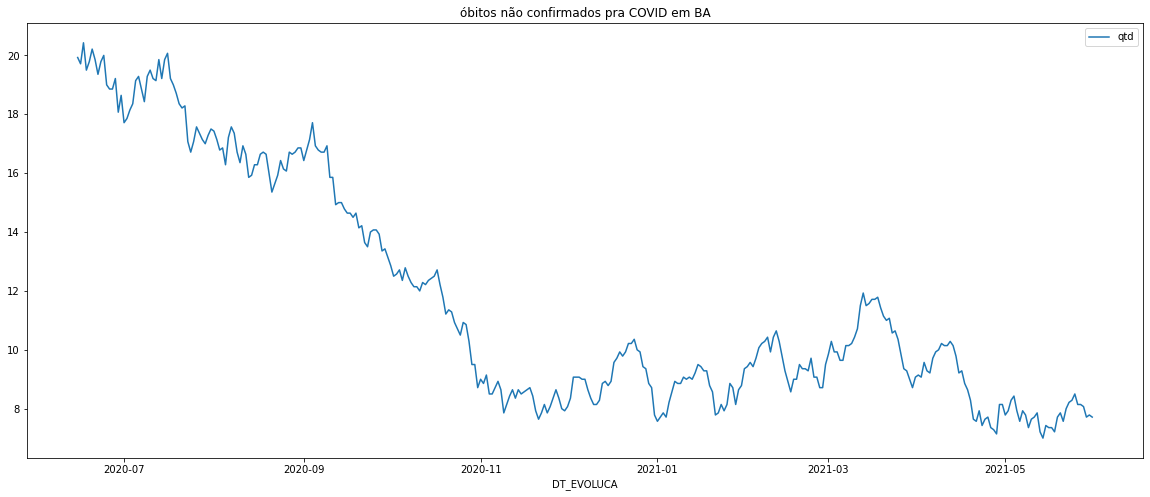

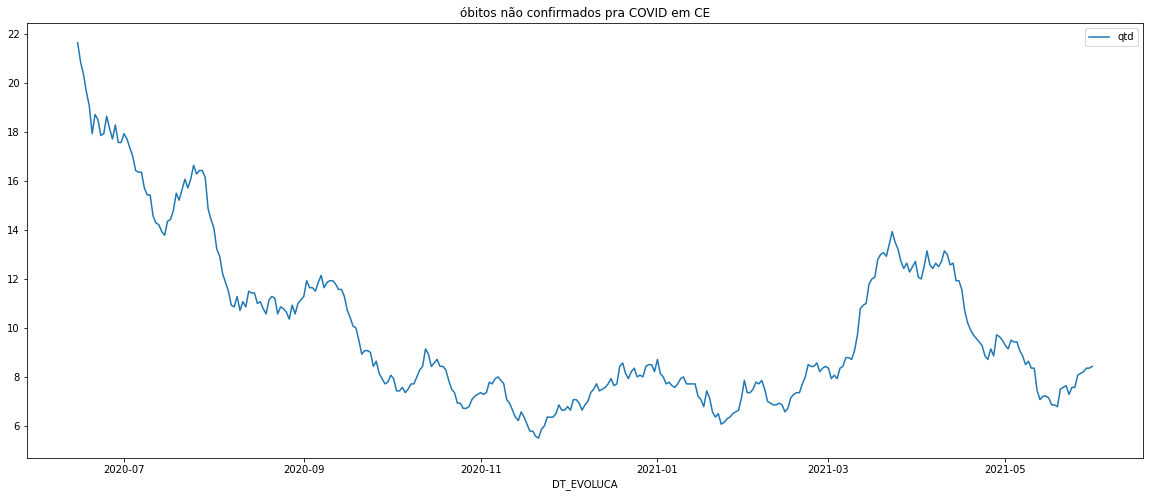

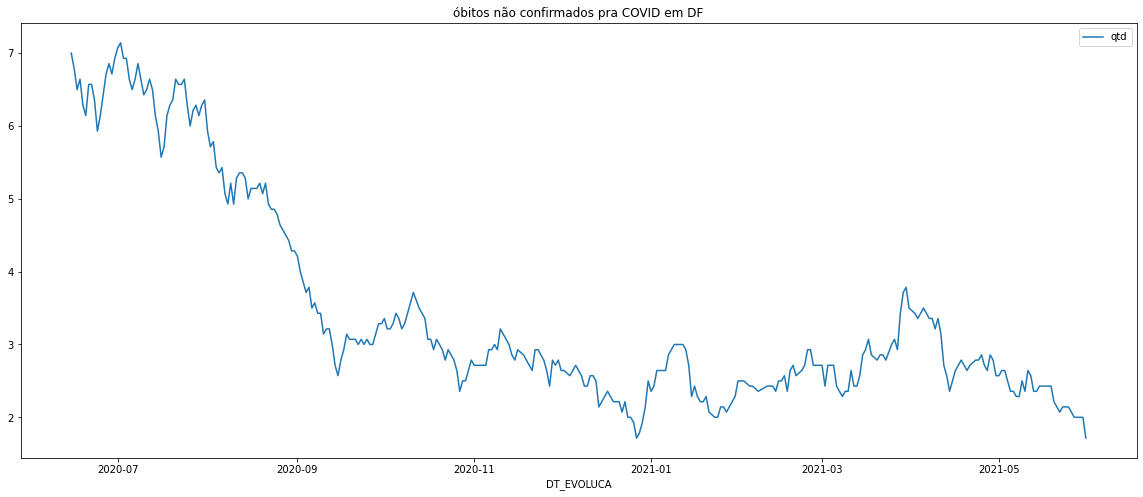

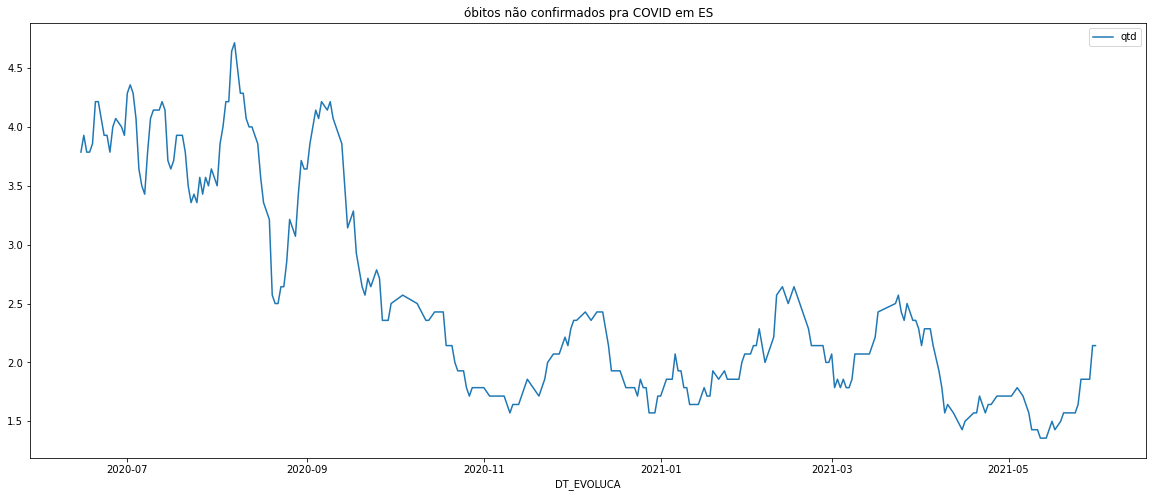

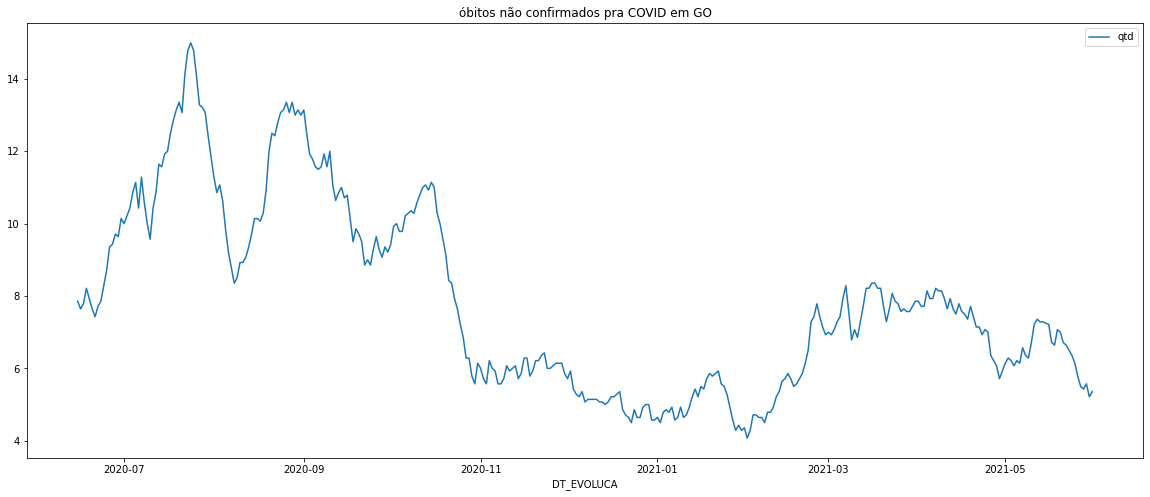

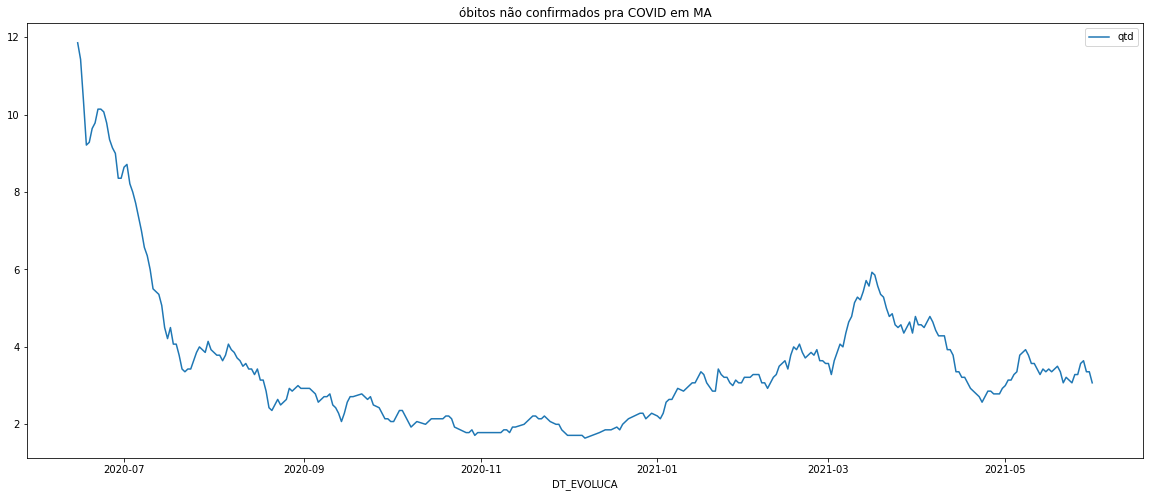

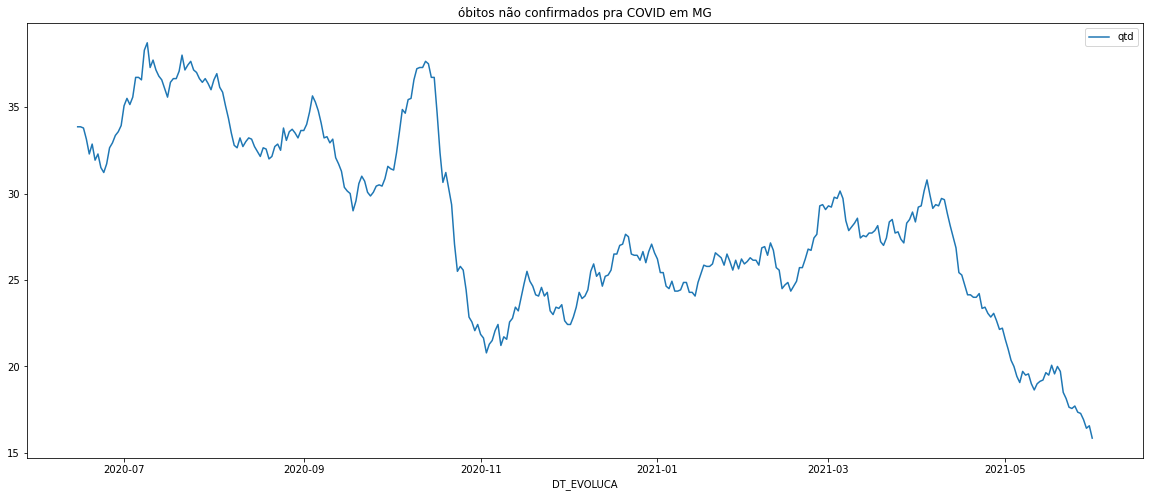

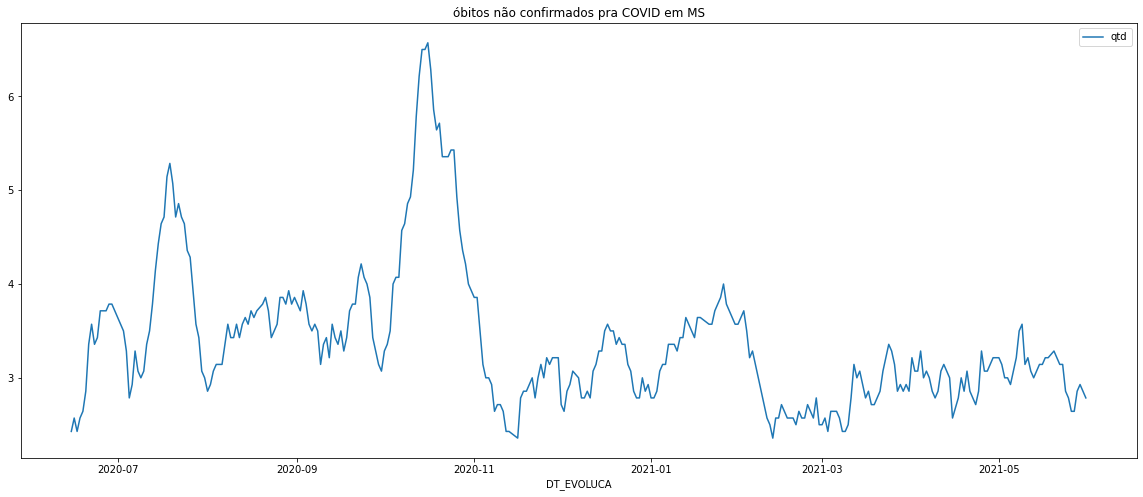

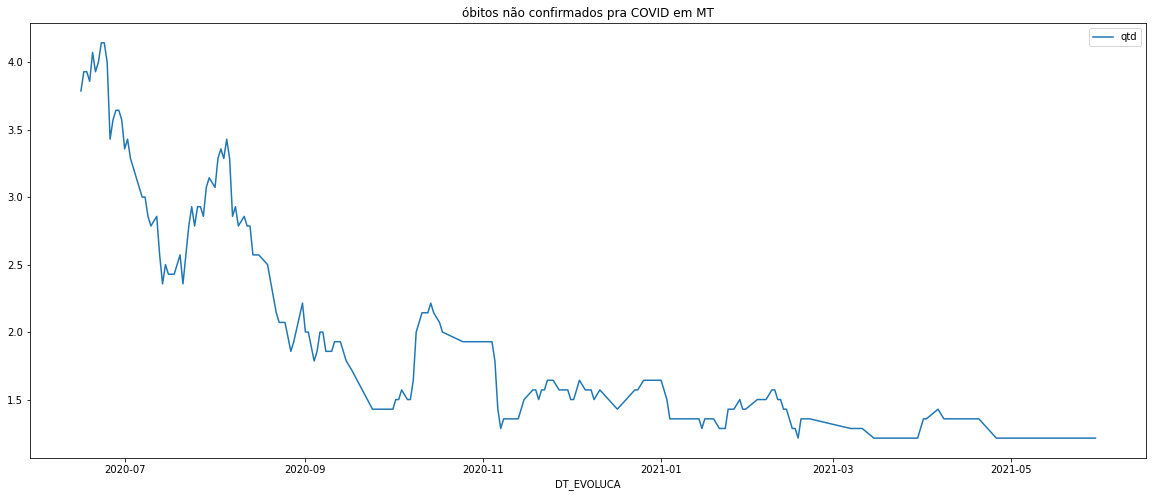

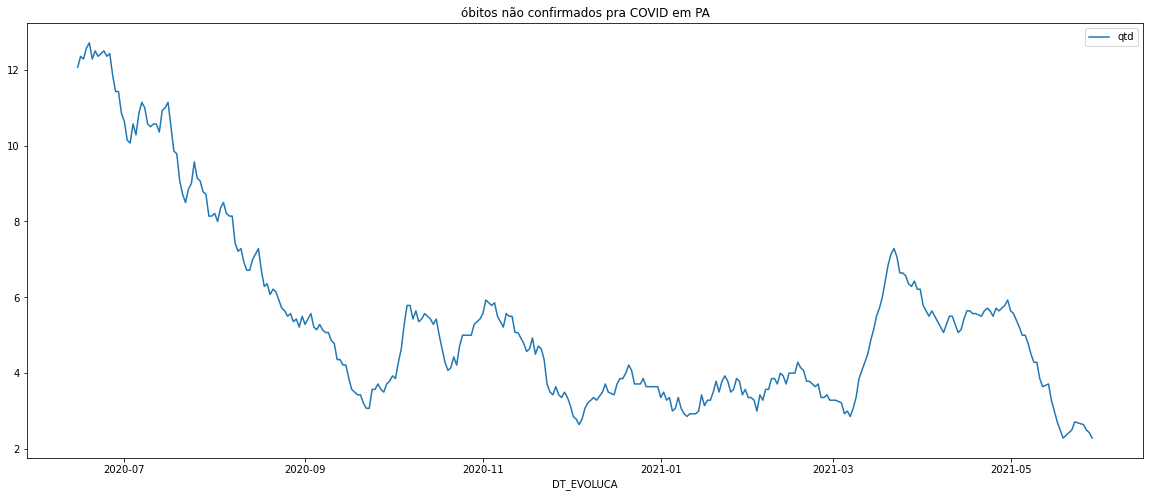

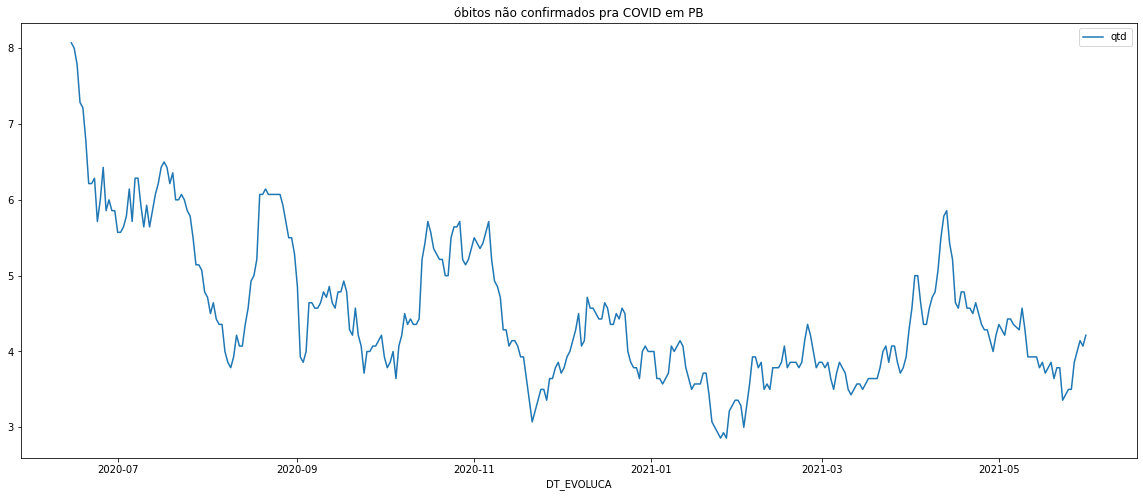

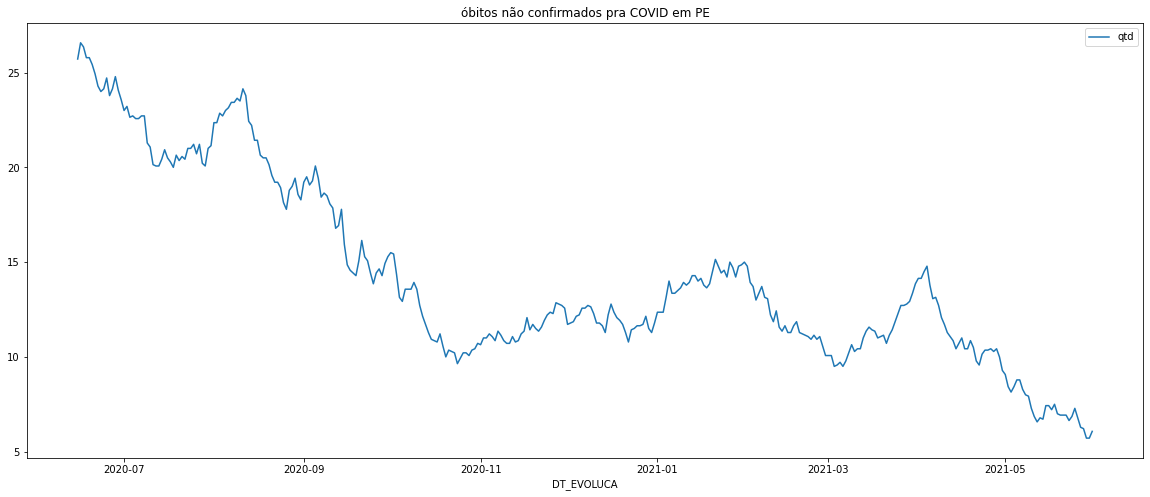

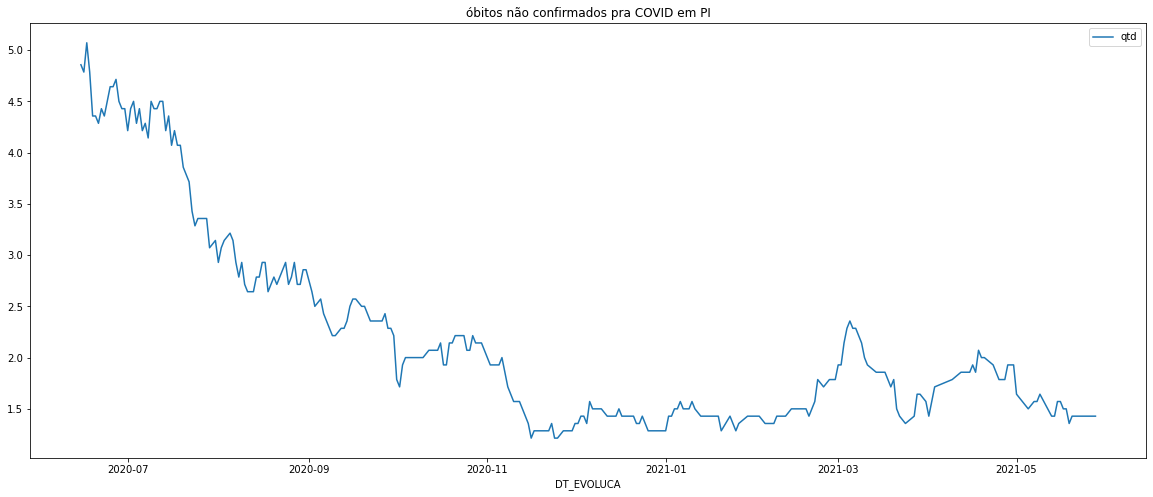

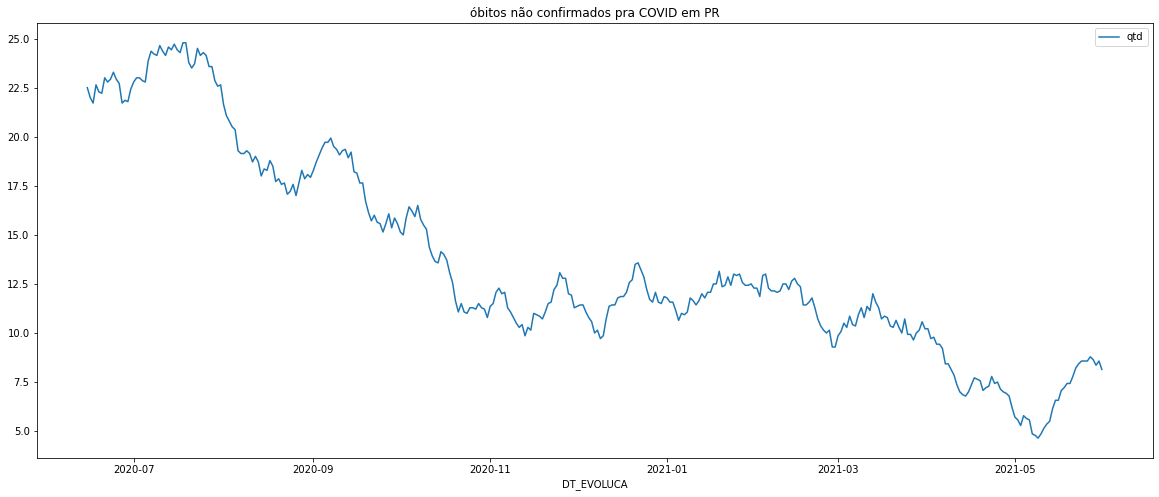

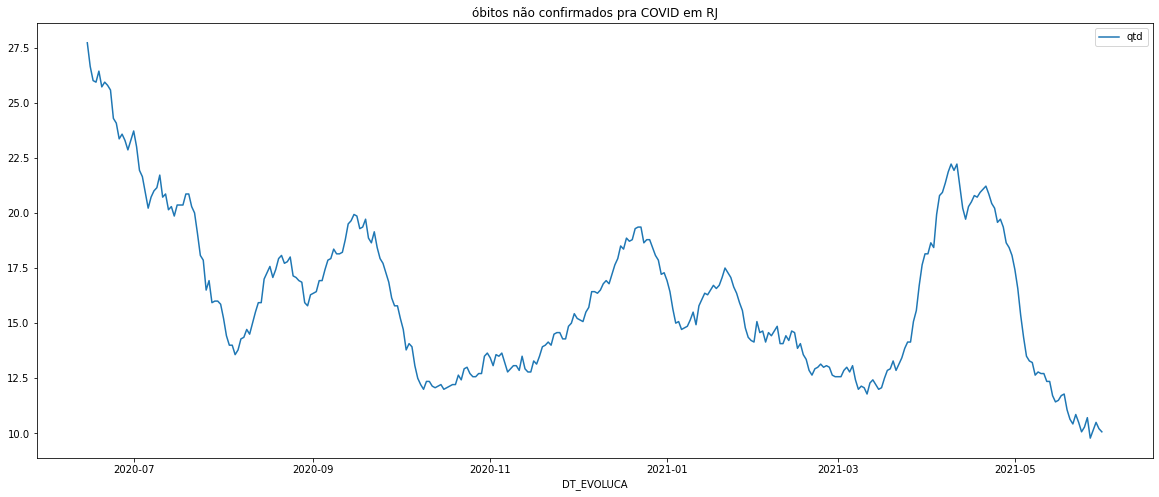

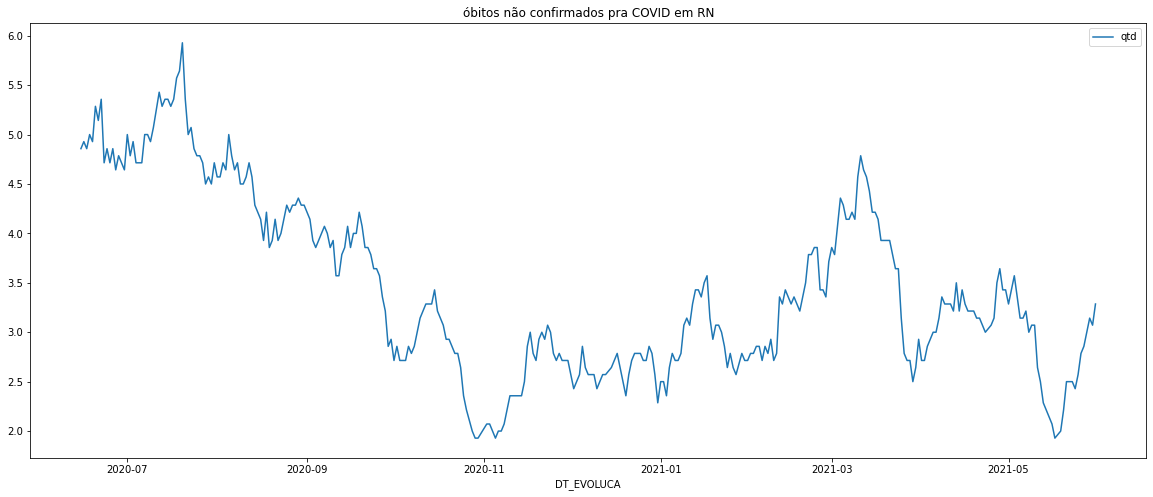

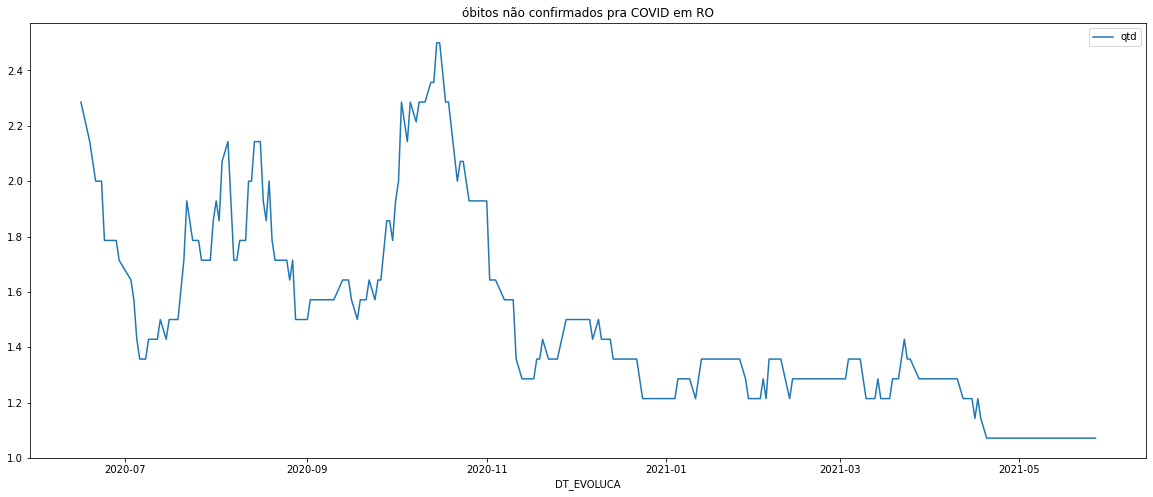

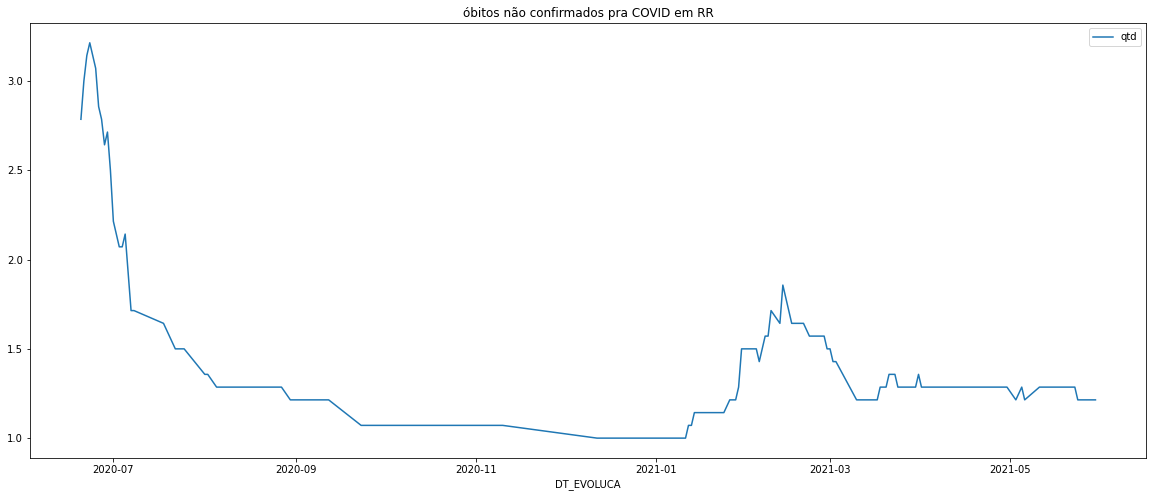

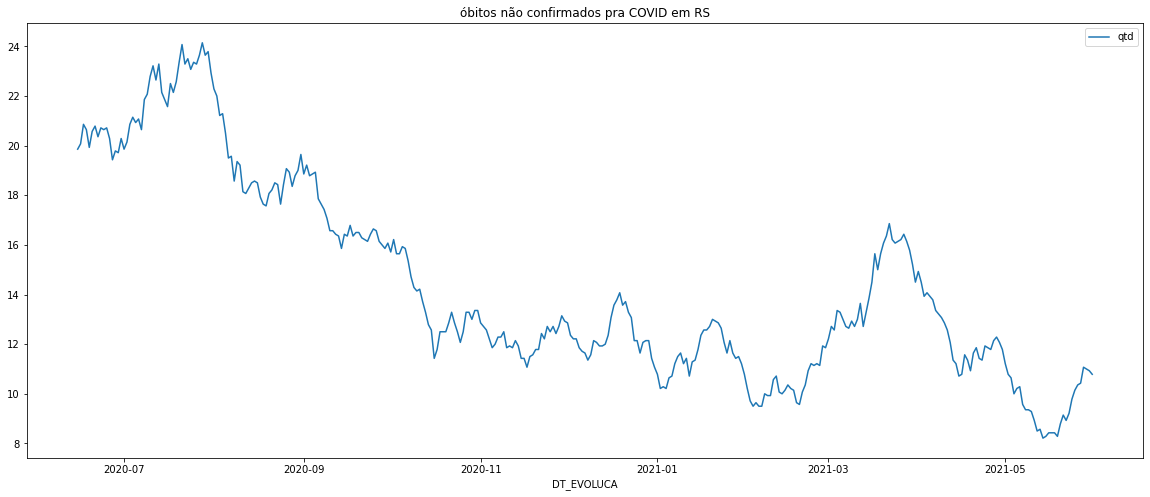

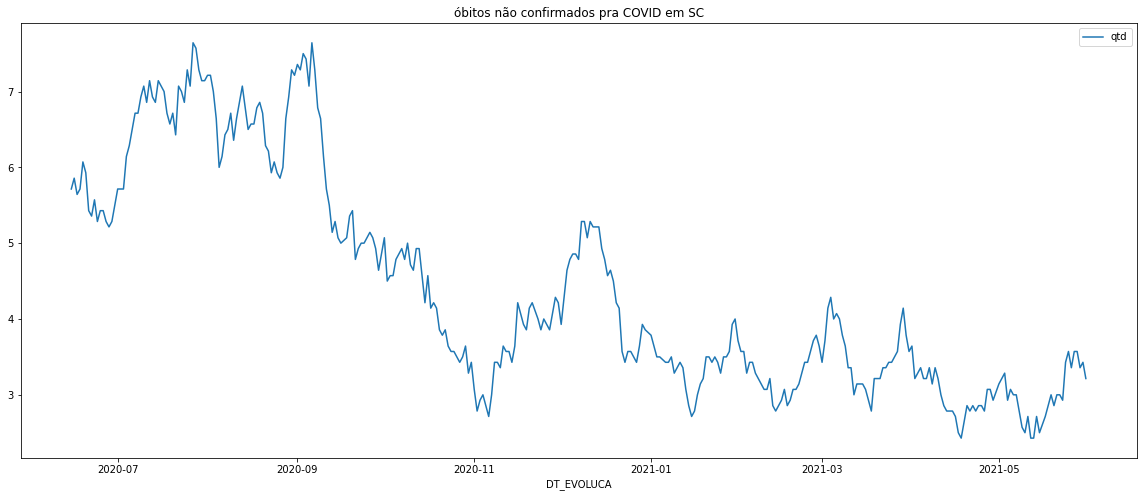

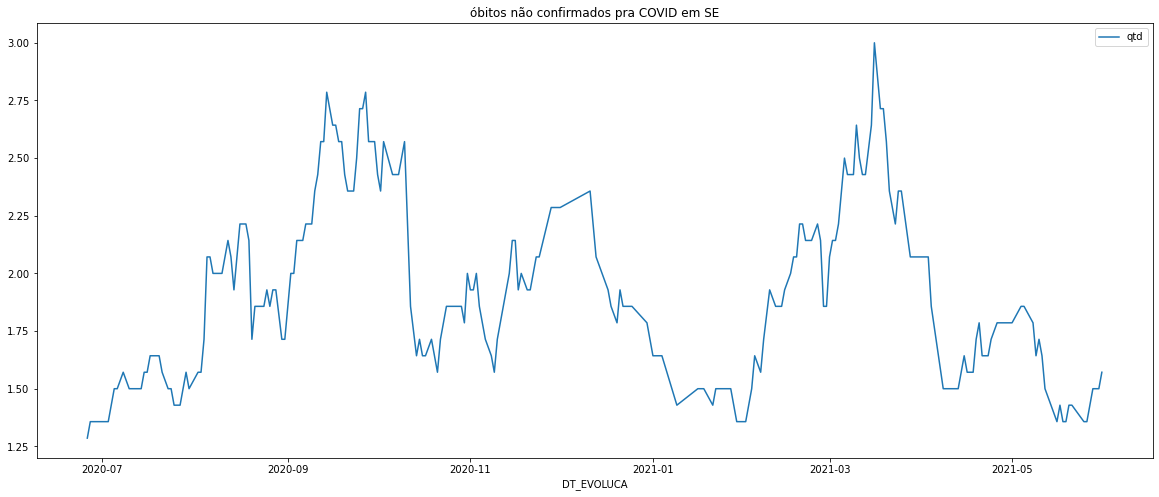

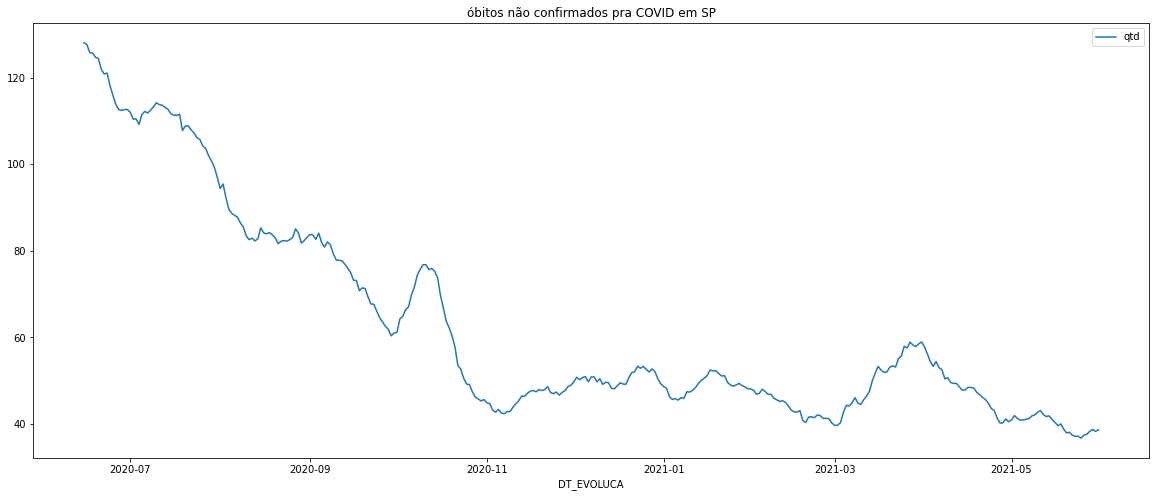

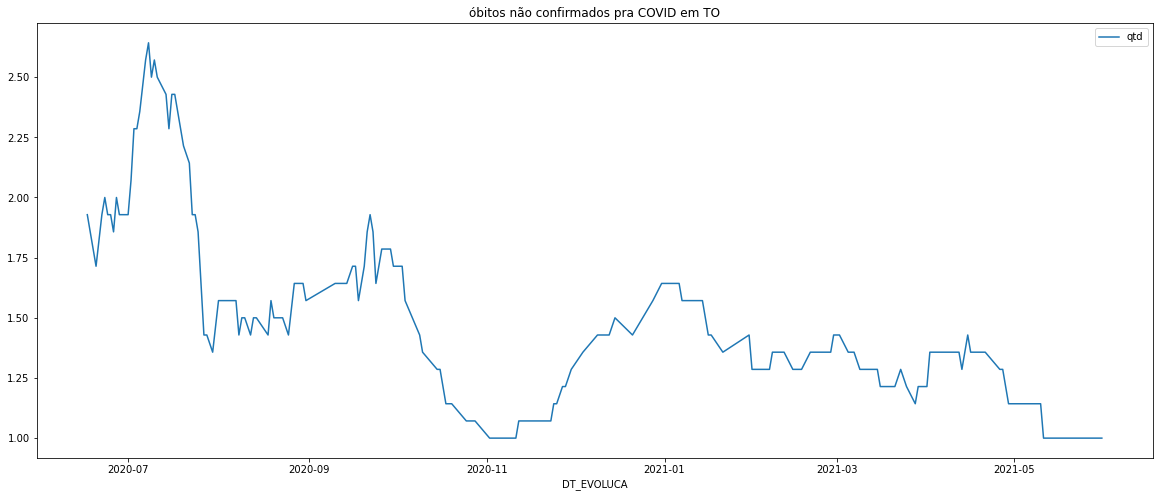

In [88]:
#SRAG NAO COVID  
for i in sorted(dfv['SG_UF_NOT'].unique()):
  df = dfv[dfv['CLASSI_FIN'] != 5]
  df = df[df['EVOLUCAO'] == 2]
  df = df[df['SG_UF_NOT'] == i]
  df = df[df['DT_EVOLUCA']>pd.to_datetime('2020-06-01')]
  df = df[df['DT_EVOLUCA']<pd.to_datetime('2021-06-01')]
  df['CAT']=pd.cut(df.NU_IDADE_N,bins=[0,idade,150],labels=['idade-','idade+'])
  df2 = df[['DT_EVOLUCA', 'CAT', 'EVOLUCAO']]
  df2 = df2.groupby(by=['DT_EVOLUCA']).size().reset_index().rename(columns={0:'qtd'})
  ap = pd.DataFrame(df2.to_records(index=False))
  ap['qtd'] = ap['qtd'].rolling(14).mean()
  print(ap.plot(x='DT_EVOLUCA',title='óbitos não confirmados pra COVID em {}'.format(i)))

In [ ]:
#RegistroCivil
#!wget https://github.com/capyvara/brazil-civil-registry-data/raw/master/civil_registry_covid_states.csv
#!cp civil_registry_covid_states.csv '/content/drive/MyDrive/dados/'
#!wget https://github.com/capyvara/brazil-civil-registry-data/raw/master/civil_registry_covid_states_detailed.csv
#!cp civil_registry_covid_states_detailed.csv '/content/drive/MyDrive/dados/'
caminho = '/content/drive/MyDrive/dados/civil_registry_covid_states.csv'
caminho = '/content/drive/MyDrive/dados/civil_registry_covid_states_detailed.csv'
df = pd.read_csv(caminho)
df = df[df['state'] == 'SP']
sp = df[['date', 'age_group',  'deaths_covid19', 'created_at']]
sp['date'] = pd.to_datetime(sp['date'],format='%Y-%m-%d', errors = 'coerce').dt.date
sp = sp[sp['date']>pd.to_datetime('2021-01-01')]
sp = sp[sp['date']<pd.to_datetime('2021-05-15')]
sp['deaths_covid19'].sum()
#df2 = df2.groupby(by=['data_inicio_sintomas', 'CAT']).size().reset_index().rename(columns={0:'qtd'})
sp2 = sp.groupby(['date', 'age_group']).sum().reset_index()
sp2 = sp2.pivot(index='age_group', columns='date', values='deaths_covid19')
sp2['sum'] = sp2[list(sp2.columns)].sum(axis=1)
sp2

50917.0

In [ ]:
#HEATMAPS
last = pd.read_csv('/content/drive/My Drive/dados/last.csv')
cols = ['NU_IDADE_N', 'CLASSI_FIN', 'EVOLUCAO','UTI', 'CS_GESTANT','DT_EVOLUCA', 'SG_UF_NOT','SUPORT_VEN','CO_MUN_NOT']
dfv = pd.read_csv('/content/drive/MyDrive/dados/srag/' + last.iloc[4,1], sep = ";", low_memory=True, usecols = cols) #merged
dfv['DT_EVOLUCA'] = pd.to_datetime(dfv['DT_EVOLUCA'],format='%d/%m/%Y', errors = 'coerce').dt.date
df = dfv[dfv['CLASSI_FIN'] == 5] 
df = df[df['EVOLUCAO'] == 2]
df = df[df['SG_UF_NOT'] == 'SP']
df = df[df['DT_EVOLUCA']>pd.to_datetime('2021-01-01')]
df = df[df['DT_EVOLUCA']<pd.to_datetime('2021-06-15')]
df['CAT']=pd.cut(df.NU_IDADE_N,bins=[0,10,20,30,40,50,60,70,80,90,100,150],labels=['9-','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+'])
df2 = df[['DT_EVOLUCA', 'CAT','EVOLUCAO']]
df2['EVOLUCAO'] = 1
#df2 = df.pivot_table(index=['DT_EVOLUCA'], columns='CAT')
df2 = df2.groupby(by=['DT_EVOLUCA', 'CAT']).sum().reset_index()
df2 = df2.pivot(index='CAT', columns='DT_EVOLUCA', values='EVOLUCAO')
df2['sum'] = df2[list(df2.columns)].sum(axis=1)
df2 = df2[['sum']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


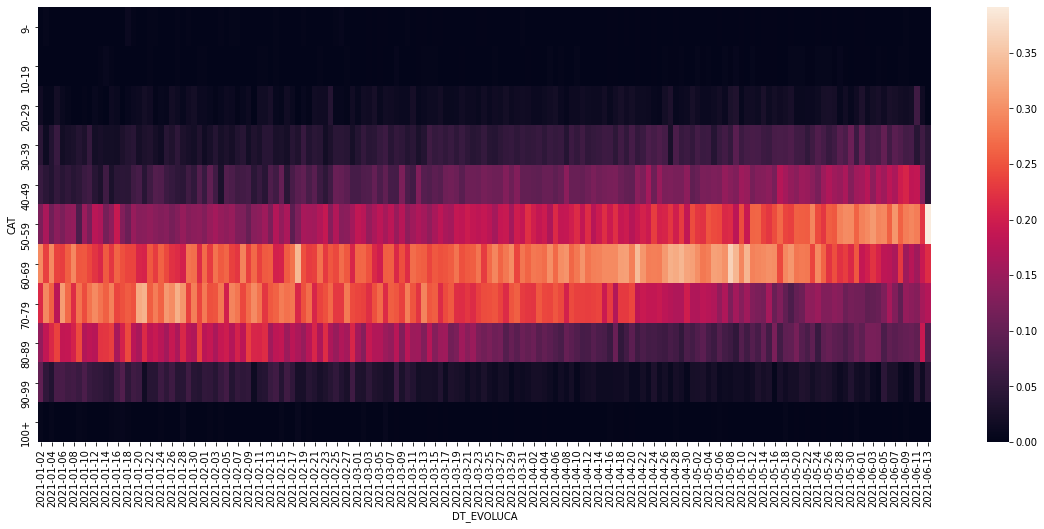

In [ ]:
df2 = df.groupby(by=['DT_EVOLUCA', 'CAT']).size().reset_index().rename(columns={0:'qtd'})
df3 = df2.pivot("CAT", "DT_EVOLUCA", "qtd")
df3 = df3.divide(df3.sum(axis=0), axis=1)
df3.head(10)
ax = sns.heatmap(df3)

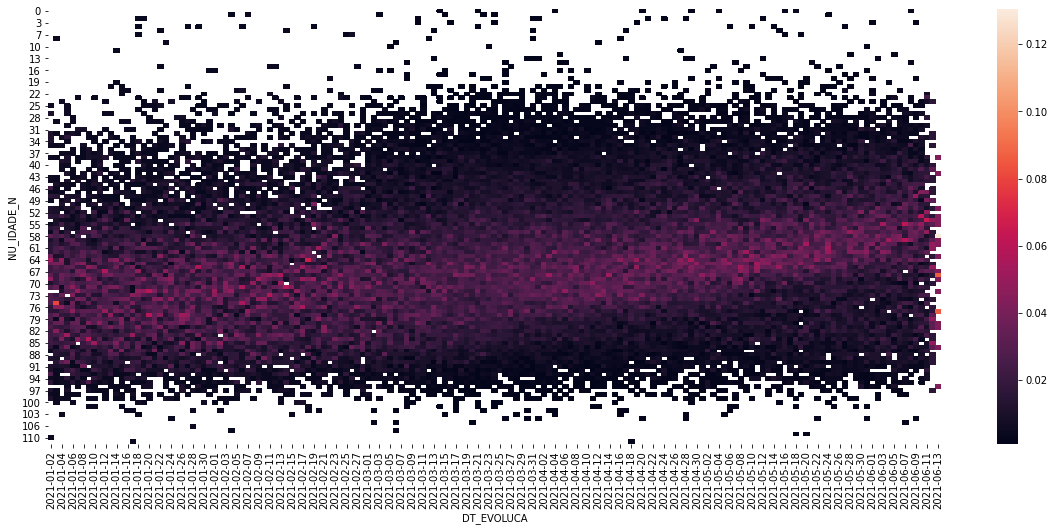

In [ ]:
df2 = df.groupby(by=['DT_EVOLUCA', 'NU_IDADE_N']).size().reset_index().rename(columns={0:'qtd'})
df3 = df2.pivot("NU_IDADE_N", "DT_EVOLUCA", "qtd")
df3 = df3.divide(df3.sum(axis=0), axis=1)
ax = sns.heatmap(df3)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

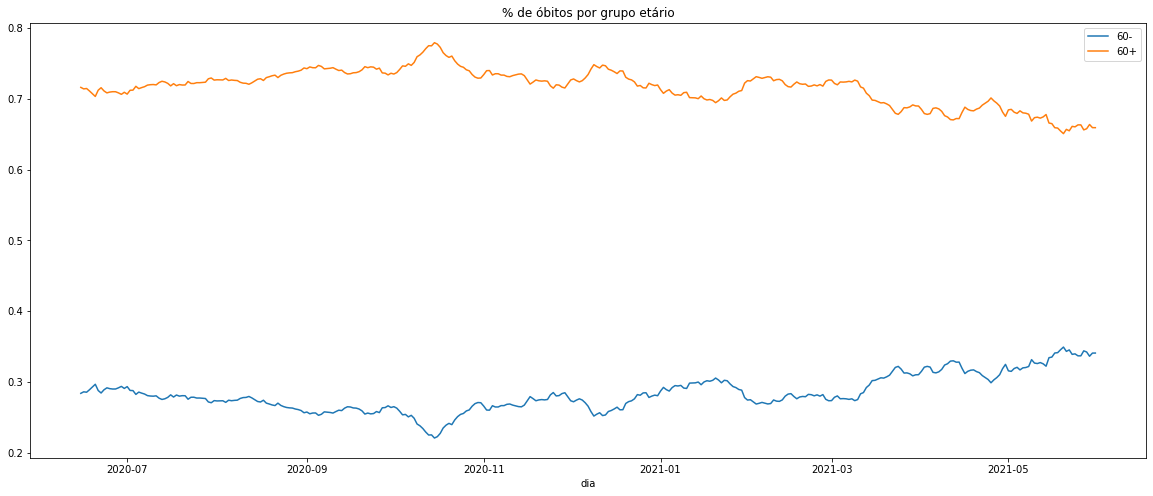

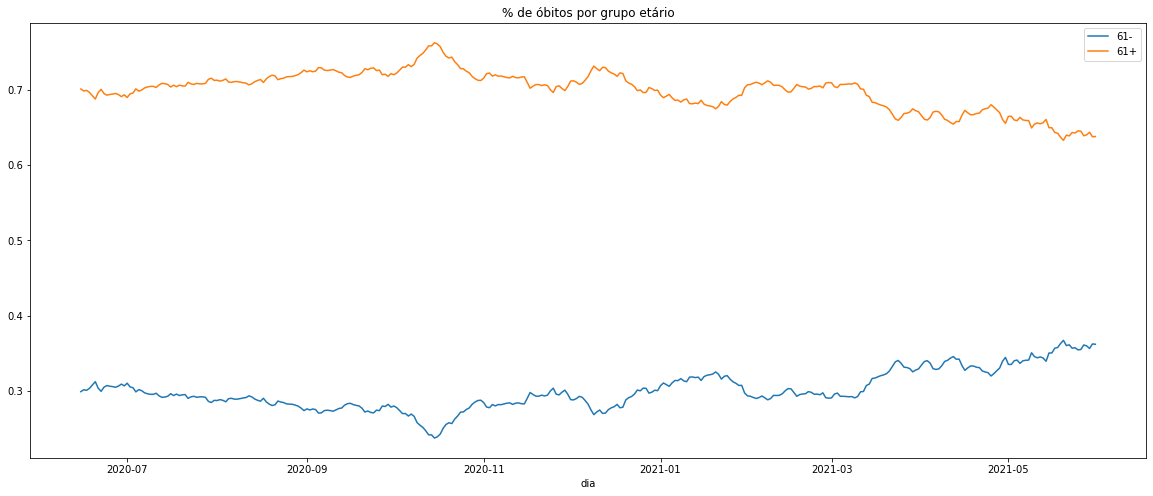

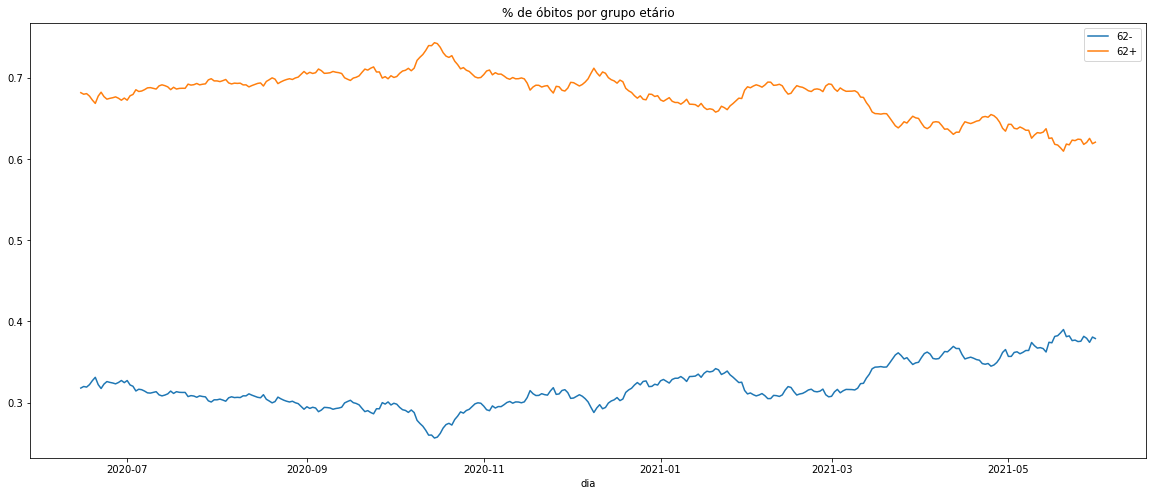

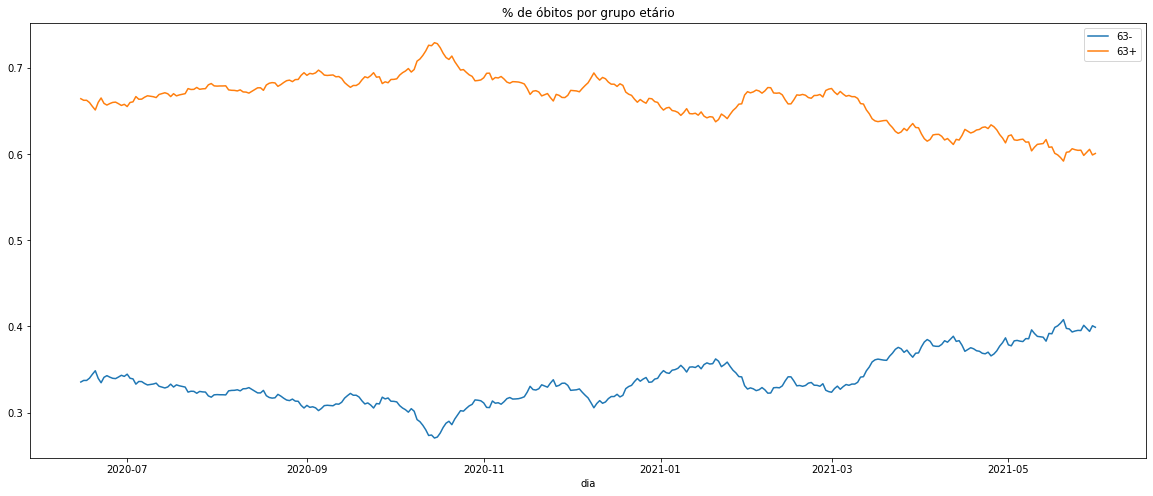

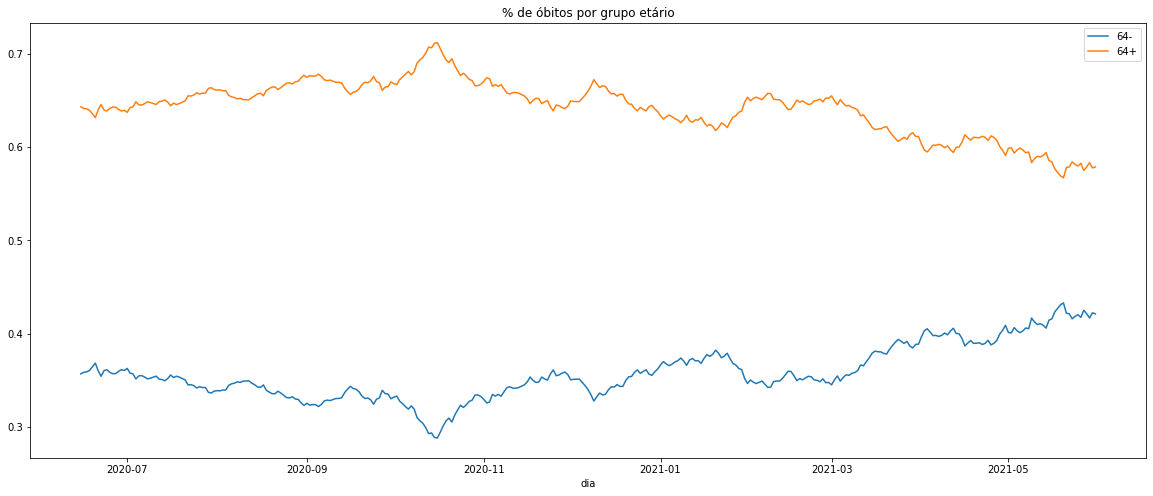

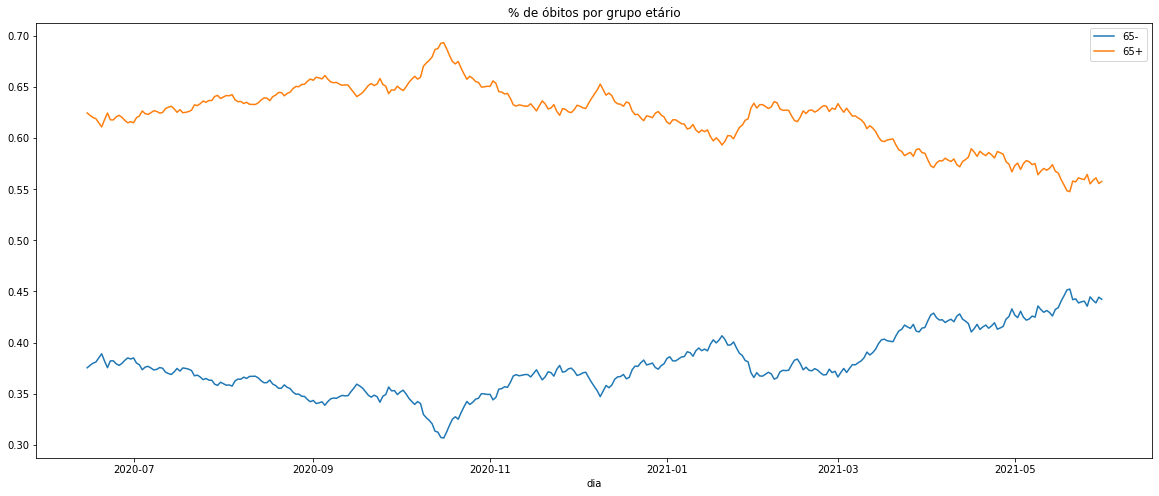

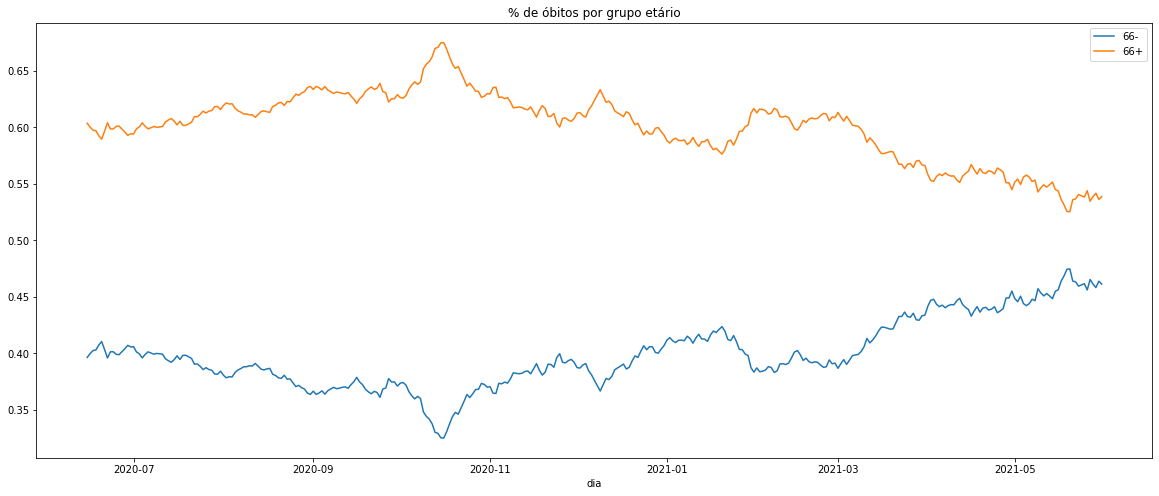

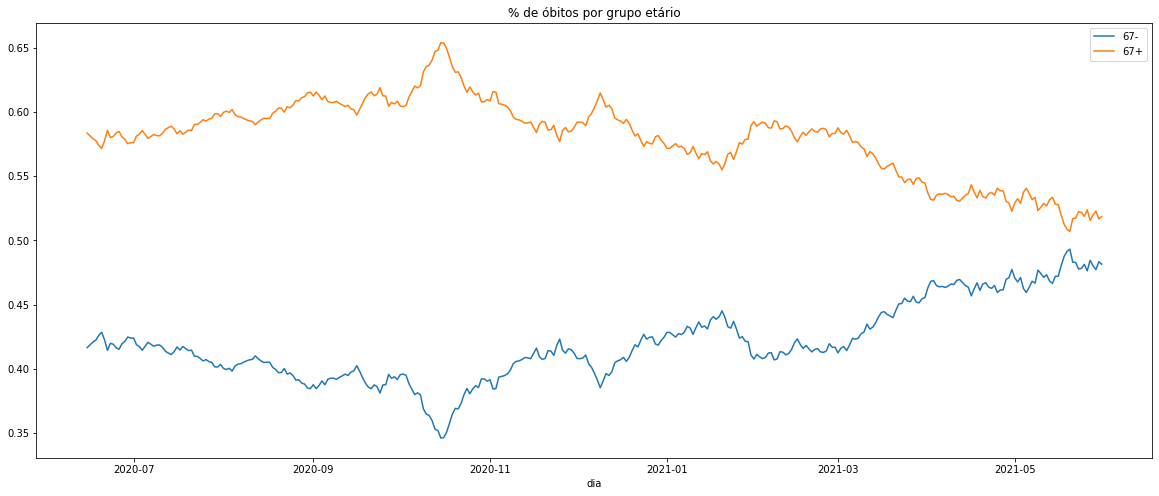

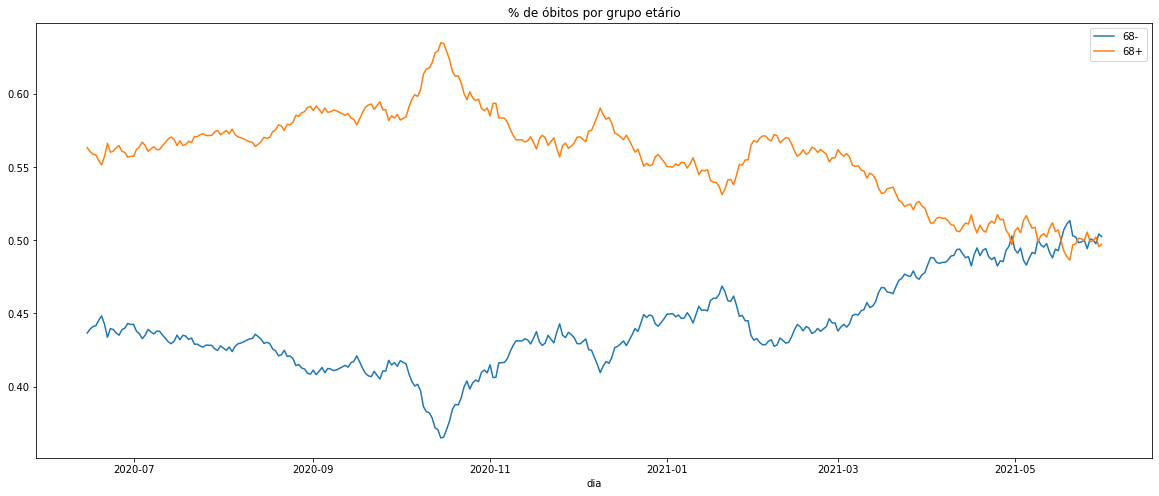

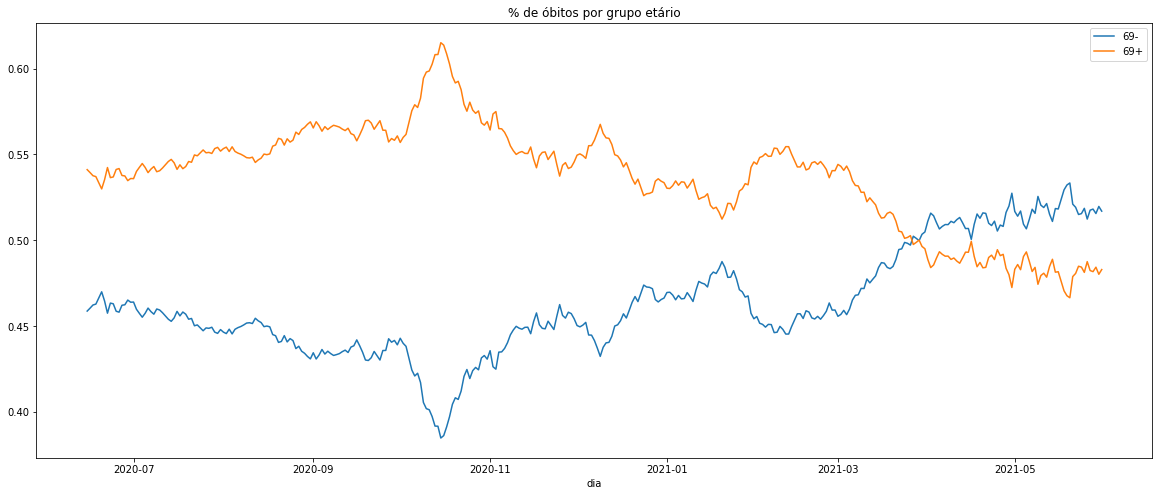

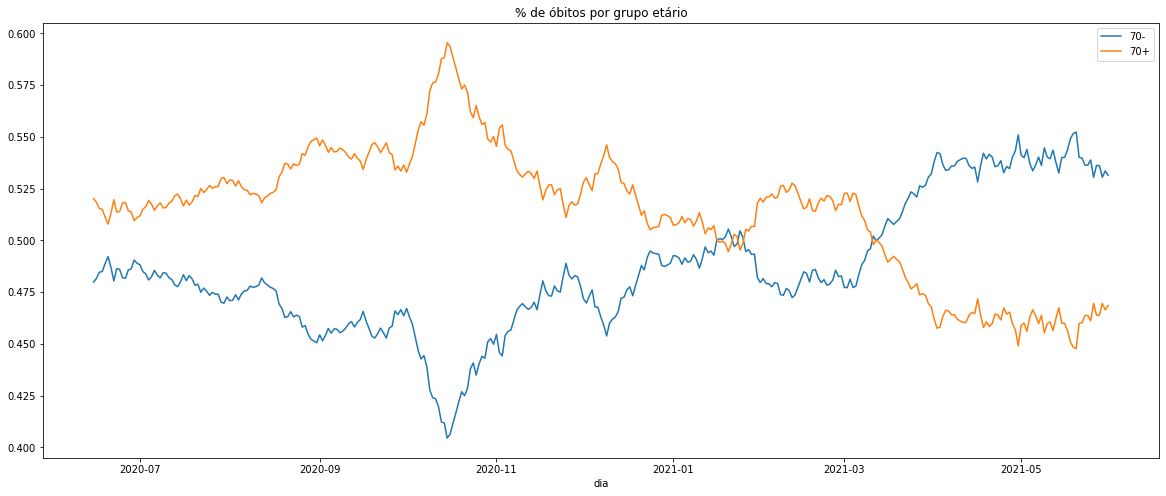

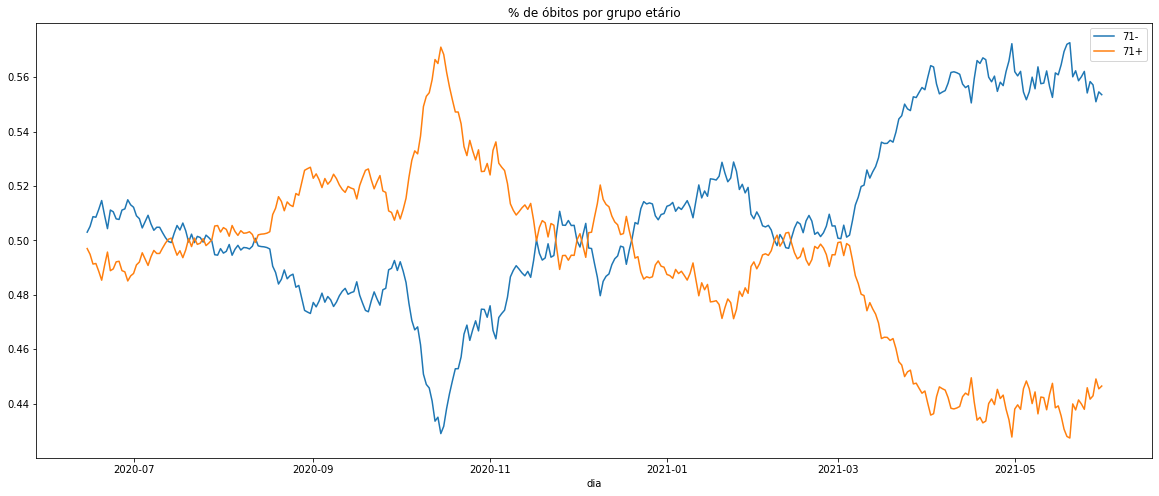

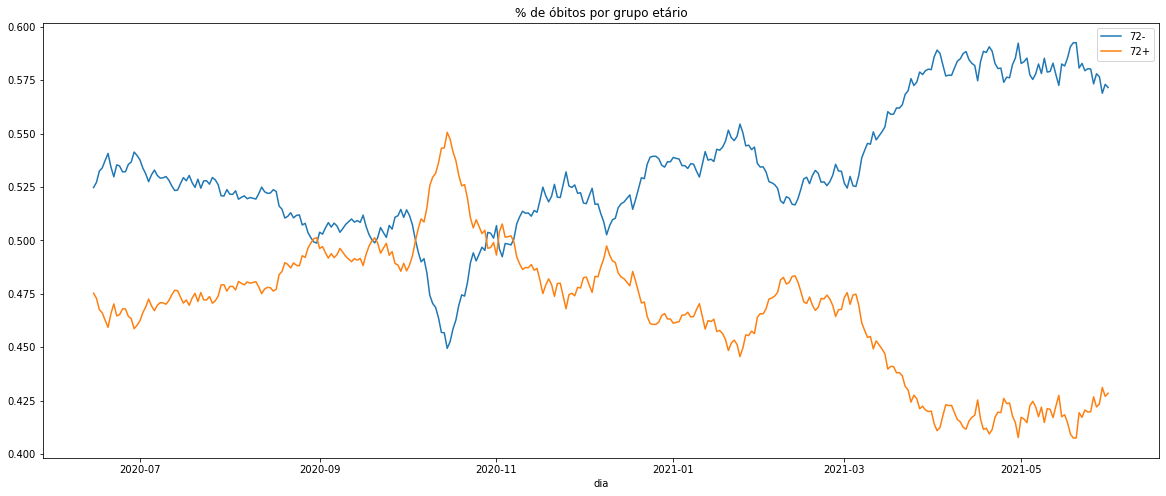

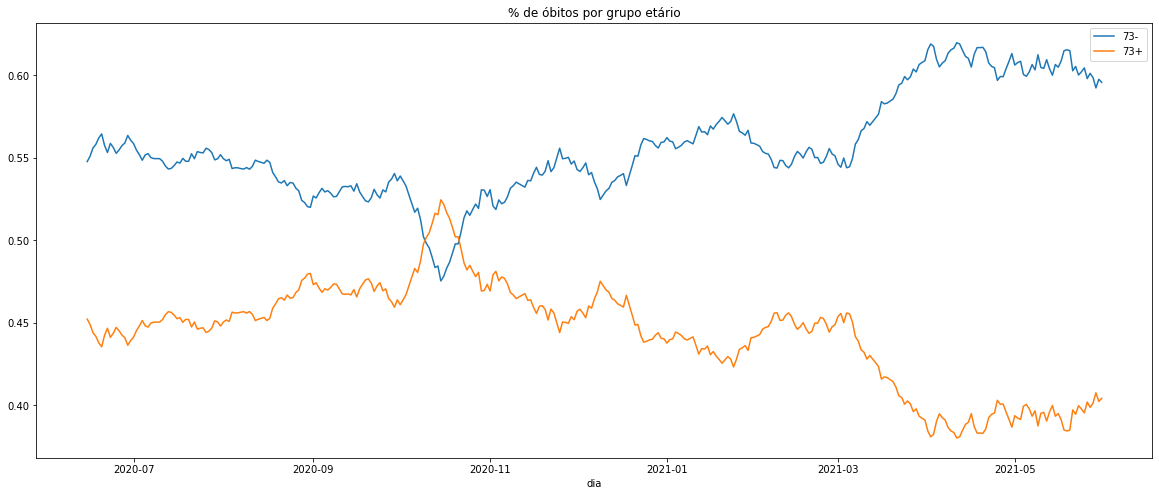

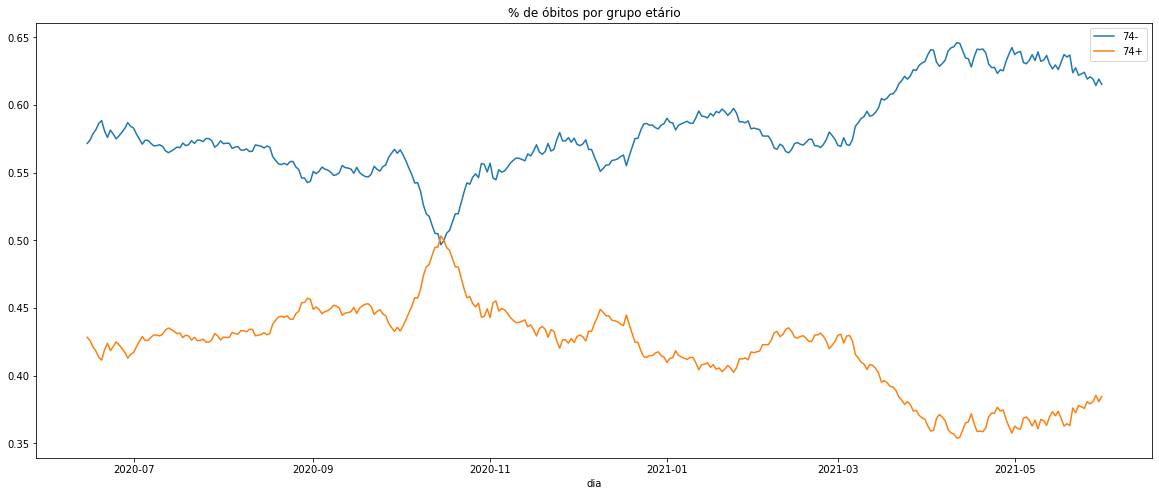

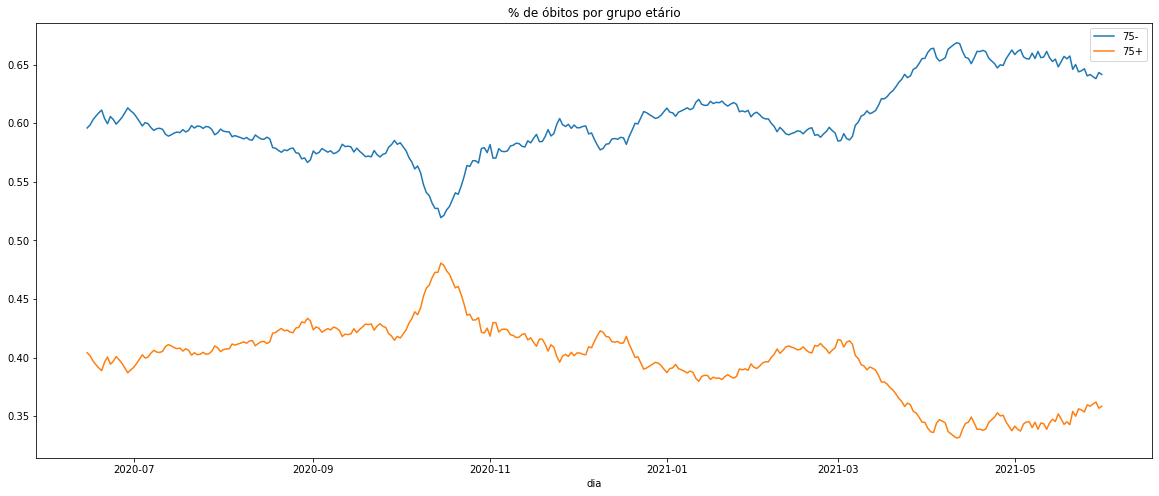

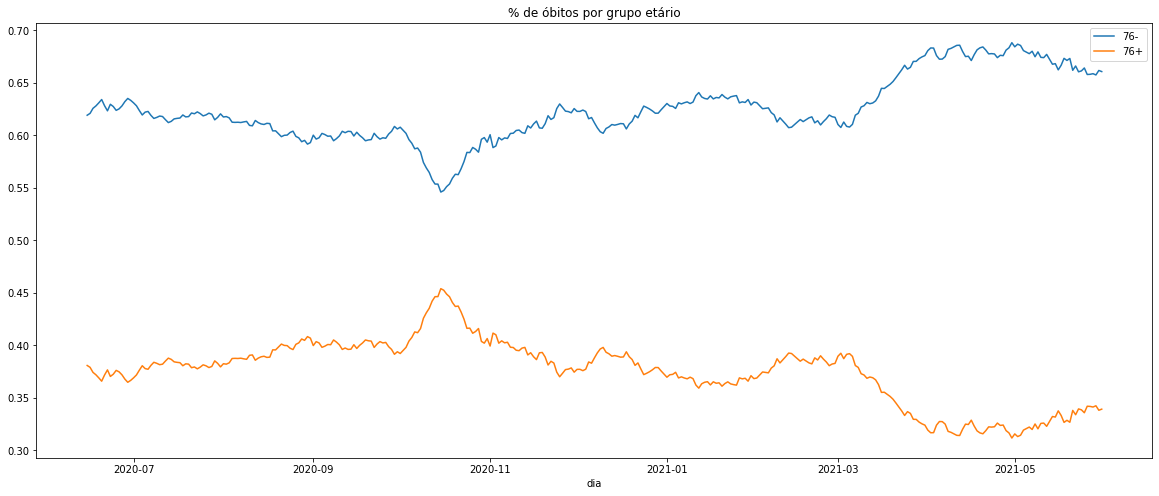

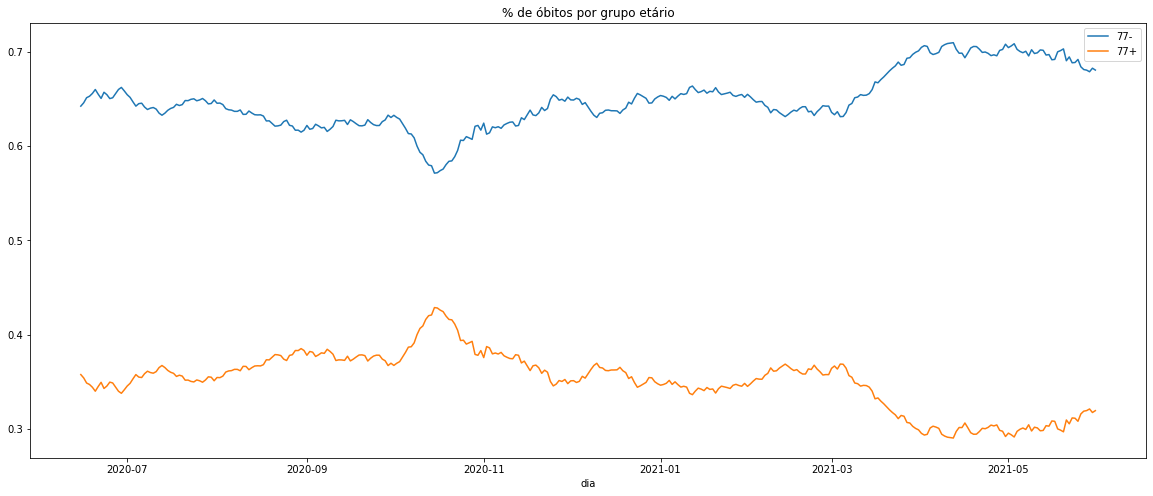

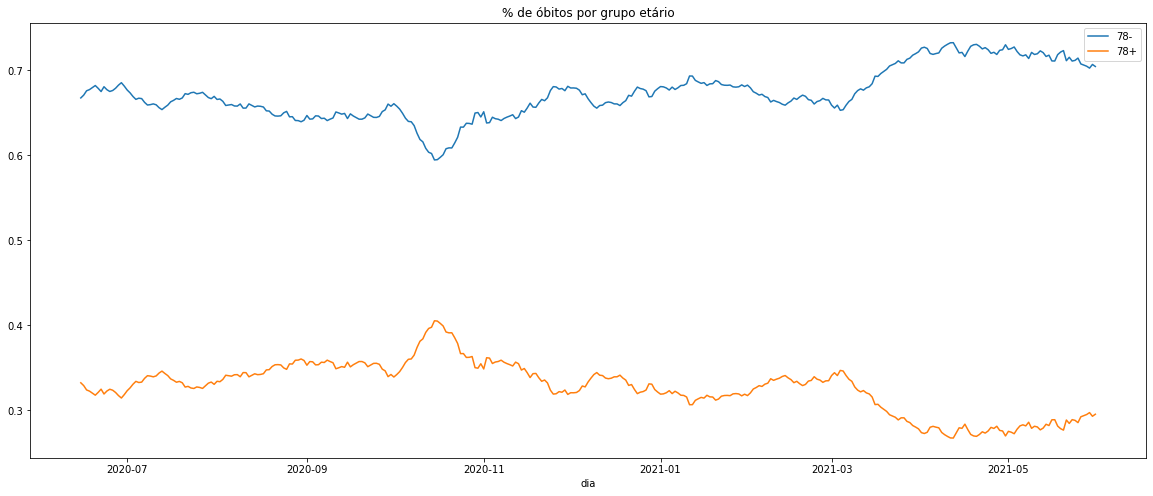

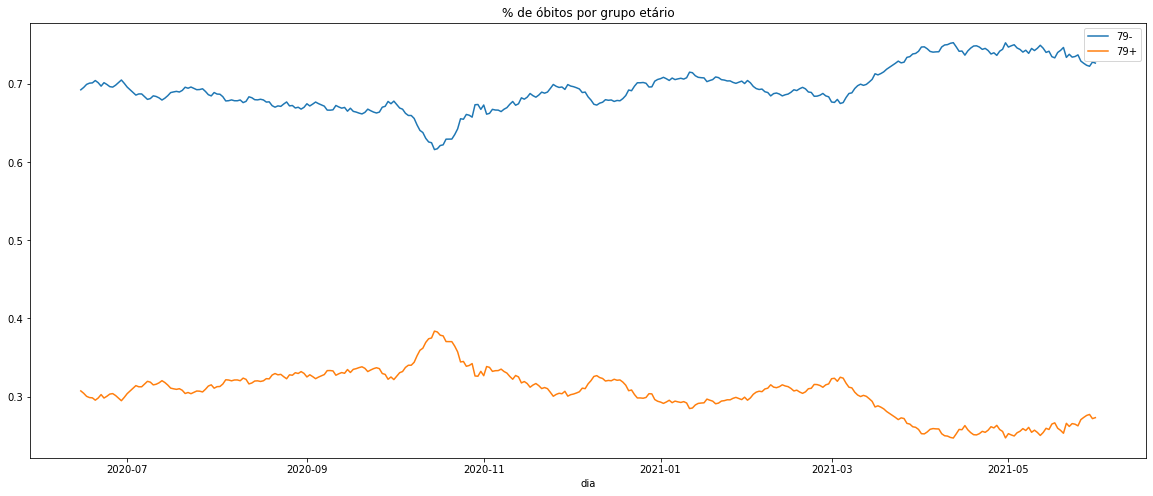

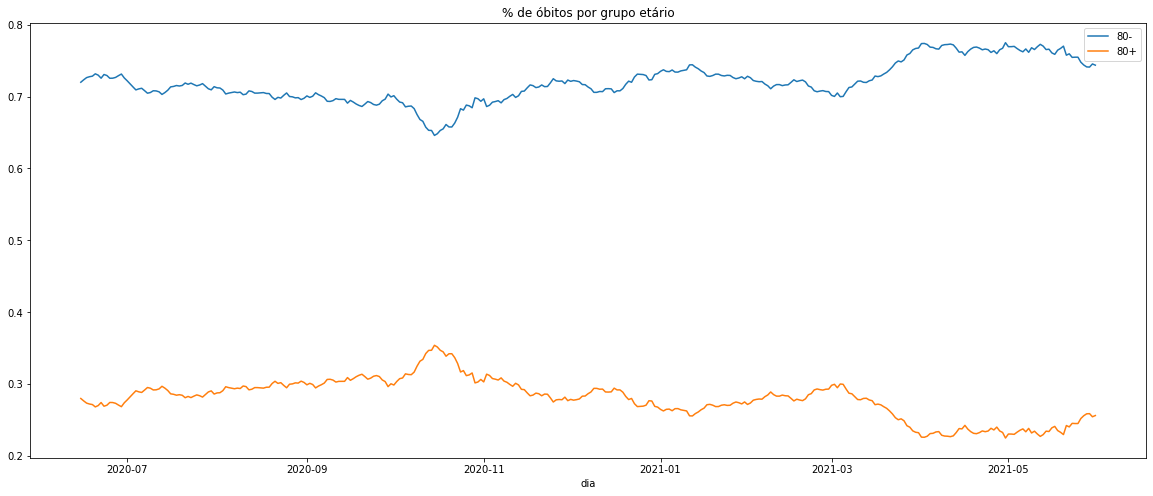

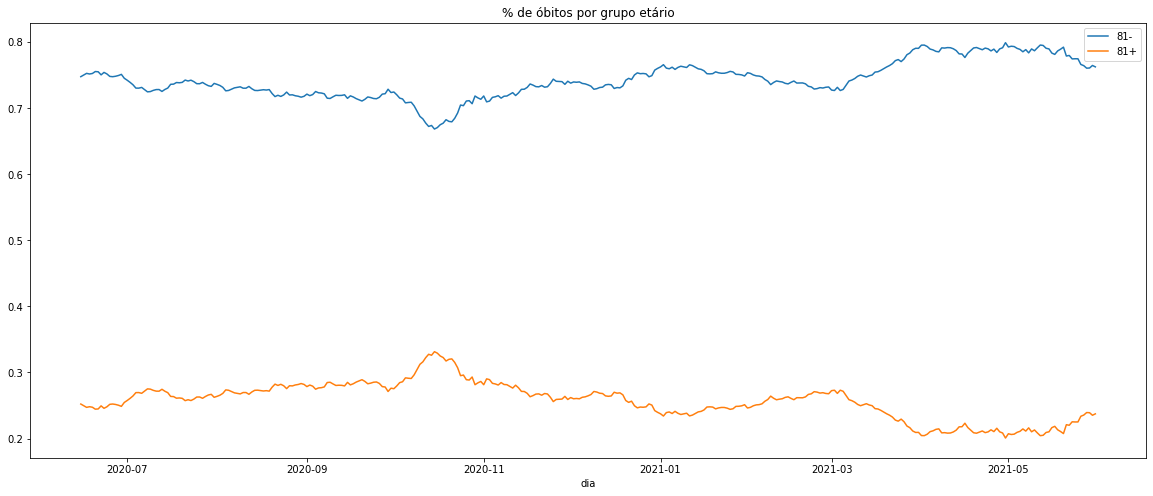

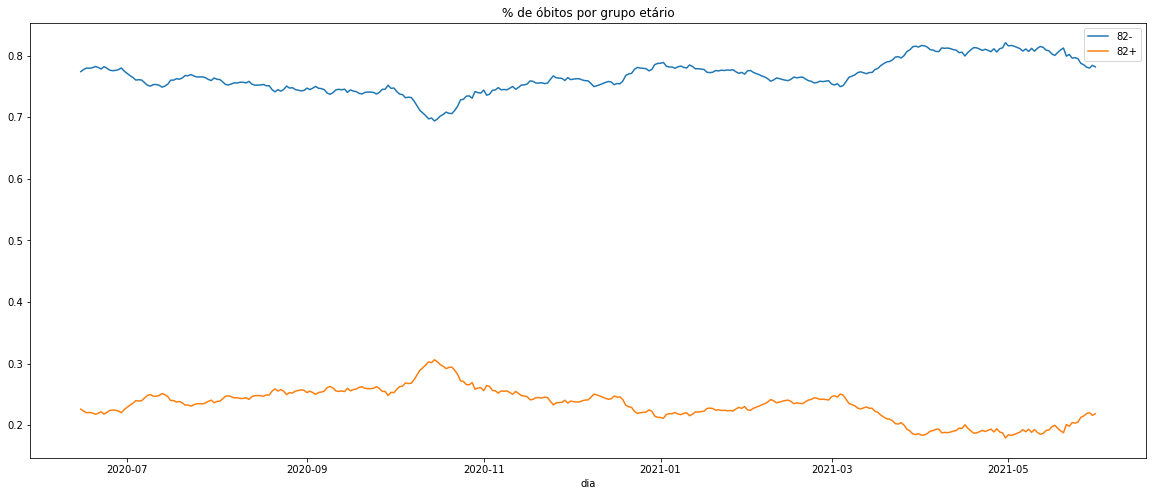

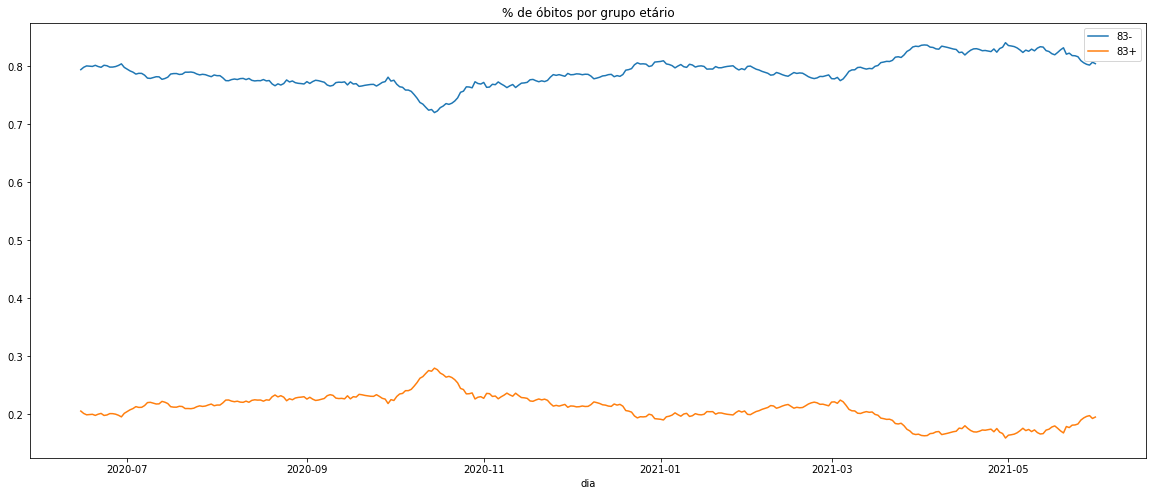

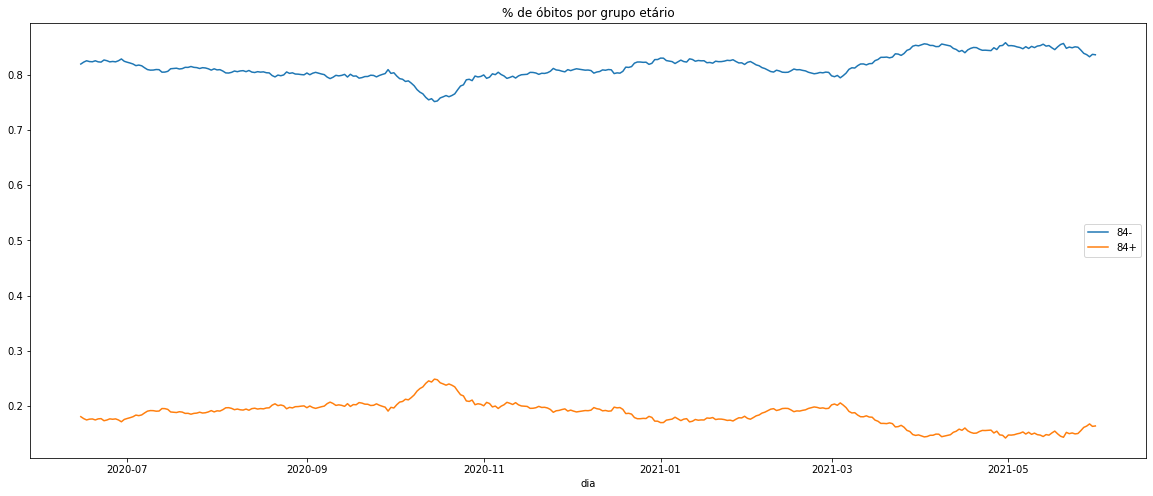

In [ ]:
for idade in range(60,85):
  df['CAT']=pd.cut(df.NU_IDADE_N,bins=[0,idade,150],labels=['80-','80+'])
  df2 = df[['DT_EVOLUCA', 'CAT', 'EVOLUCAO']]
  #df2 = df.pivot_table(index=['DT_EVOLUCA'], columns='CAT')
  df2 = df2.groupby(by=['DT_EVOLUCA', 'CAT']).size().reset_index().rename(columns={0:'qtd'})
  df2 = df2.pivot_table(index=['DT_EVOLUCA'], columns='CAT')
  df2
  ap = pd.DataFrame(df2.to_records())
  colunas = ['dia','0+','10+','20+','30+','40+','50+','60+','70+','80+','90+','100+']
  colunas = ['dia','{}-'.format(idade),'{}+'.format(idade)]
  ap.columns = colunas
  for i in colunas[1:]:
    ap[i] = ap[i].rolling(14).mean()
  ap = ap.set_index('dia')
  df3 = ap.divide(ap.sum(axis=1), axis=0)
  #df3.plot.area()
  df3.plot(title='% de óbitos por grupo etário')